Que: Does ML model draw inferences from categorical data also, like gender? If then then categorical data also should be correctly imputed.

# *Problem Statement & Importing necessary libraries*

Background

The COVID-19 pandemic, caused by the SARS-CoV-2 virus, emerged in late 2019 and rapidly spread globally, leading to significant health, economic, and social impacts. This unprecedented health crisis highlighted the crucial role of data analysis in managing such pandemics. By meticulously tracking and analyzing data on confirmed cases, recoveries, and deaths, policymakers and health professionals can make informed decisions to control the spread of the virus and allocate resources effectively.

Dataset Details:

This case study utilizes three key datasets, each providing daily updates on different aspects of the pandemic for various countries and regions:

*   Confirmed Cases Dataset: This dataset contains the cumulative number of confirmed COVID-19 cases per day for each country and region. The data spans from January 22, 2020, to May 29, 2021, with over 276 geographic entries.
*   Deaths Dataset: This dataset records the cumulative number of deaths attributed to COVID-19, structured similarly to the confirmed cases dataset. It provides crucial information for assessing the lethality and outbreak severity in different areas.
*   Recovered Cases Dataset: Includes data on the cumulative number of individuals who have recovered from COVID-19, which is vital for understanding the disease's progression and the effectiveness of treatment protocols.

Each dataset includes columns for Province/State, Country/Region, geographic coordinates (Lat, Long), and a series of dates representing daily cumulative totals.



*Importing required modules.*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*Mounting G-drive. Or comment it if connected.*

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')

# **Analysis of confirmed_case_data**

*Importing datasets. Provide the correct path file as per your system.*

In [3]:
confirmed_case_data = pd.read_csv('/content/drive/MyDrive/ChaiCode/DS_with_priya_bhatia/covid_19_confirmed_v1_lyst1747728690432.csv')

*Take a glance at dataset one by one.*

In [4]:
print(f'The shape of the confirmed_cases_data set is {confirmed_case_data.shape}', end = '\n\n')
confirmed_case_data.head(3)

The shape of the confirmed_cases_data set is (276, 498)



,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456


*Refactoring the column positions and names for easyness.*

*   *Swapping Country & province column; country being the broader category.*
*   *Full name of Lat & Long.*
*   *Formatting date coluns as per IST standards.*

In [5]:
#converting dataframe columns to list columns to do swap
col_list = list(confirmed_case_data.columns)
col_list[0], col_list[1] = col_list[1], col_list[0]
confirmed_case_data = confirmed_case_data[col_list] # assigning column names list back to dataframe

confirmed_case_data.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)

#To convert column name (Dates) we need to parse them as date, then only we can reformat them. Especially if months/days are single digits.
date_columns = confirmed_case_data.columns[4:]
new_date_columns = pd.to_datetime(date_columns, format='%m/%d/%y').strftime('%d/%b/%Y') ## strftime convert datetime object to a string in a specified format.
confirmed_case_data.columns = list(confirmed_case_data.columns[:4]) + list(new_date_columns)

confirmed_case_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,Albania,NaN,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,Algeria,NaN,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456


Note that in above code we have performed datetime operation on only column names and not on whole column or its values.

If there are any Nan values in Datetime column, that column dtype must be float64 (since pandas uses NaN for missing values, which is a float).

*Now lets see dtypes of each column.*

In [6]:
confirmed_case_data.info()  # usually used to see dtypes. Pandas is truncating the output when there are too many columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Country/Region to 29/May/2021
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


In [7]:
confirmed_case_data.dtypes
# Data type of date column's values should be int. Because it is number of cases and it cannot be float.

,0
Country/Region,object
Province/State,object
Latitude,float64
Longitude,float64
22/Jan/2020,int64
...,...
25/May/2021,int64
26/May/2021,int64
27/May/2021,int64
28/May/2021,int64


*From above we can see dtypes of Country, Province, Latitude and Longitude are fine.*

Let's check all Date column dtypes.

In [8]:
print( * (col for col in confirmed_case_data.columns[4:] if 'int' not in str(confirmed_case_data[col].dtype)))
# unpacking operator * used to print the values, otherwise it would print generator object.

# date_columns = confirmed_case_data.columns[4:]
# confirmed_case_data[date_columns] = confirmed_case_data[date_columns].astype('int64')

*Handling missing values*

 isnull() and isna() do same work. isnull() is old and isna() is new.
 isna() is often recommended over isnull() for consistency with related functions like dropna() and fillna()


 But they both don't check int columns 0 values.

In [9]:
# confirmed_case_data.isnull().sum() -- gives truncated result.
print(confirmed_case_data.isnull().any().sum())

3


printing column names containing NaN values.

In [10]:
null_col = confirmed_case_data.isnull().sum() # returns series with index=column name and value=missing value count in that column.
print(null_col [null_col>0].to_string()) # to print where null values is more than 0.

Province/State    190
Latitude            2
Longitude           2


**Imputing Province missing values:**

*What to impute for Province ?*


*   From below we can see that 1 country has N provinces but the province is not repeated. Meaning each row is unique for a particular geolocation. So, we cannot use mode or median for imputation because it will lead to duplicate location. Hence we will impute the missing province values with 'Unknown' or could use the Country name itself in province.
{for those whose latit & longi are given, we could search the province from web, but not done as we have their co-ordinates anyway and province is just a categorical data}



In [11]:
# Cross check if 1 country has many provinces.
duplicate_countries = confirmed_case_data[confirmed_case_data.duplicated(subset = ['Country/Region'])]
print(duplicate_countries.shape, end = '\n\n')
duplicate_countries

(83, 498)



,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
9,Australia,New South Wales,-33.868800,151.209300,0,0,0,0,3,4,...,5567,5568,5570,5572,5574,5576,5576,5579,5580,5585
10,Australia,Northern Territory,-12.463400,130.845600,0,0,0,0,0,0,...,170,170,171,171,171,171,172,172,173,173
11,Australia,Queensland,-27.469800,153.025100,0,0,0,0,0,0,...,1595,1597,1597,1605,1607,1611,1613,1615,1616,1618
12,Australia,South Australia,-34.928500,138.600700,0,0,0,0,0,0,...,747,748,748,748,749,750,752,752,752,752
13,Australia,Tasmania,-42.882100,147.327200,0,0,0,0,0,0,...,234,234,234,234,234,234,234,234,234,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,United Kingdom,Isle of Man,54.236100,-4.548100,0,0,0,0,0,0,...,1591,1591,1591,1591,1591,1591,1591,1591,1592,1592
263,United Kingdom,Montserrat,16.742498,-62.187366,0,0,0,0,0,0,...,20,20,20,20,20,20,20,20,20,20
264,United Kingdom,"Saint Helena, Ascension and Tristan da Cunha",-7.946700,-14.355900,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
265,United Kingdom,Turks and Caicos Islands,21.694000,-71.797900,0,0,0,0,0,0,...,2407,2408,2408,2408,2409,2409,2409,2411,2411,2412


In [12]:
# Checking if there are repeated Country-Province pair.
duplicate_country_province = confirmed_case_data[confirmed_case_data.duplicated(subset = ['Country/Region', 'Province/State'])]
duplicate_country_province

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021


Imputing 'All Provinces' value for missing province.

In [13]:
confirmed_case_data['Province/State'] = confirmed_case_data['Province/State'].fillna('All Provinces')
confirmed_case_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,All Provinces,33.93911,67.709953,0,0,0,0,0,0,...,64575,65080,65486,65728,66275,66903,67743,68366,69130,70111
1,Albania,All Provinces,41.15330,20.168300,0,0,0,0,0,0,...,132118,132153,132176,132209,132215,132229,132244,132264,132285,132297
2,Algeria,All Provinces,28.03390,1.659600,0,0,0,0,0,0,...,126156,126434,126651,126860,127107,127361,127646,127926,128198,128456


Cross checking if it is updated

In [14]:
null_col = confirmed_case_data.isnull().sum()
print(null_col [null_col>0].to_string())

Latitude     2
Longitude    2


**Imputing missing values of Latitudes & Longitudes:**

*It is ideal that since dataset is geolocation specific, latitudes and longitudes should also be not repeated. But lets take a look.*

In [15]:
duplicate_lat_long = confirmed_case_data[confirmed_case_data.duplicated(subset = ['Latitude', 'Longitude'])]
duplicate_lat_long

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
42,Canada,Grand Princess,0.0,0.0,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
88,China,Unknown,NaN,NaN,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Diamond Princess,All Provinces,0.0,0.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
173,MS Zaandam,All Provinces,0.0,0.0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


*   From above we can see latitudes & longitudes are not repeated.
*   There are some (0,0) values which is humorously referred to as "Null Island" in the Atlantic Ocean where there is is no land, which also needs to be imputed.





*Lets see what all rows has NaN or 0 as Latitude or Longitudes.*

In [16]:
missing_coords = confirmed_case_data[
    confirmed_case_data['Latitude'].isnull() |
    (confirmed_case_data['Latitude'] == 0) |
    confirmed_case_data['Longitude'].isnull() |
    (confirmed_case_data['Longitude'] == 0)
]
print(missing_coords.to_string())

       Country/Region          Province/State  Latitude  Longitude  22/Jan/2020  23/Jan/2020  24/Jan/2020  25/Jan/2020  26/Jan/2020  27/Jan/2020  28/Jan/2020  29/Jan/2020  30/Jan/2020  31/Jan/2020  01/Feb/2020  02/Feb/2020  03/Feb/2020  04/Feb/2020  05/Feb/2020  06/Feb/2020  07/Feb/2020  08/Feb/2020  09/Feb/2020  10/Feb/2020  11/Feb/2020  12/Feb/2020  13/Feb/2020  14/Feb/2020  15/Feb/2020  16/Feb/2020  17/Feb/2020  18/Feb/2020  19/Feb/2020  20/Feb/2020  21/Feb/2020  22/Feb/2020  23/Feb/2020  24/Feb/2020  25/Feb/2020  26/Feb/2020  27/Feb/2020  28/Feb/2020  29/Feb/2020  01/Mar/2020  02/Mar/2020  03/Mar/2020  04/Mar/2020  05/Mar/2020  06/Mar/2020  07/Mar/2020  08/Mar/2020  09/Mar/2020  10/Mar/2020  11/Mar/2020  12/Mar/2020  13/Mar/2020  14/Mar/2020  15/Mar/2020  16/Mar/2020  17/Mar/2020  18/Mar/2020  19/Mar/2020  20/Mar/2020  21/Mar/2020  22/Mar/2020  23/Mar/2020  24/Mar/2020  25/Mar/2020  26/Mar/2020  27/Mar/2020  28/Mar/2020  29/Mar/2020  30/Mar/2020  31/Mar/2020  01/Apr/2020  02/Apr/20

In [17]:
for country in ['Canada', 'China', 'Diamond Princess', 'MS Zaandam']:
  print(country, confirmed_case_data.loc[confirmed_case_data['Country/Region'] == country].shape)

Canada (16, 498)
China (34, 498)
Diamond Princess (1, 498)
MS Zaandam (1, 498)


***What to impute in Latitudes and Longitudes?***

Latitude and longitudes should be treated as categorical or descrete or continous data ?

*   We cannot use mode or median, as it will lead to duplicate coordinates and may not represent that specific province of that country.

*   Observing filled data we saw coordinates represent the approximate central points of the capital cities of those provinces. For correct country and province, we can find the coordinates from internet. But there could be N such rows in large dataset. We will impute with the mean of that country's provinces coordinates. Logically coordinates are categorical data as here they are representing unique location, but given as continous numerical data.

 Here Diamond & Grand Princess are cruise ships quaratined during covid. And repatriated represents returned citizens, not a location. But dataset can cotain more such rows with filled Coordinates which we have not figured out. That's why we imputed these rows with mean of that country.

*   Diamond cruise and MS Zaandam in country column are cruise ship with province Unknown. And there is also 1 entry of them so cannot impute them with mean also. For not to loose data, we imputed them with 180 (which is pacific ocean loc) and document the value as special case.

Imputing Latitude and Longitude:

In [18]:
for country in ['Canada', 'China']:
    country_specific_df = confirmed_case_data['Country/Region'] == country # gives boolean df
    # Calculate mean for non-zero, non-NaN latitudes and longitudes
    latitude_mean = confirmed_case_data.loc[country_specific_df & (confirmed_case_data['Latitude'] != 0), 'Latitude'].mean()
    longitude_mean = confirmed_case_data.loc[country_specific_df & (confirmed_case_data['Longitude'] != 0), 'Longitude'].mean()
    # Replace NaN or 0 with the mean
    empty_latitude_column = country_specific_df & (confirmed_case_data['Latitude'].isnull() | (confirmed_case_data['Latitude'] == 0))
    empty_longitude_column = country_specific_df & (confirmed_case_data['Longitude'].isnull() | (confirmed_case_data['Longitude'] == 0))
    confirmed_case_data.loc[empty_latitude_column, 'Latitude'] = latitude_mean
    confirmed_case_data.loc[empty_longitude_column, 'Longitude'] = longitude_mean

Cross check if NaN is updated with Mean.

In [19]:
confirmed_case_data.loc[[41, 42, 52, 58]]

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
41,Canada,Diamond Princess,54.527354,-92.507531,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
42,Canada,Grand Princess,54.527354,-92.507531,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
52,Canada,Repatriated Travellers,54.527354,-92.507531,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
58,China,Anhui,31.825700,117.226400,1,9,15,39,60,70,...,1001,1001,1002,1002,1004,1004,1004,1004,1004,1004


In [20]:
# to update specific latitude and longitude
confirmed_case_data.loc[105, ['Latitude', 'Longitude']] = [180, -180]
confirmed_case_data.loc[173, ['Latitude', 'Longitude']] = [180, -180]
confirmed_case_data.loc[[105, 173]] # loc prints the row as a Series by default. We have printed it as DataFrame row using [[]]

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
105,Diamond Princess,All Provinces,180.0,-180.0,0,0,0,0,0,0,...,712,712,712,712,712,712,712,712,712,712
173,MS Zaandam,All Provinces,180.0,-180.0,0,0,0,0,0,0,...,9,9,9,9,9,9,9,9,9,9


Cross checking if any zero or NaN coordinates still remaning.

In [21]:
missing_coords = confirmed_case_data[
    confirmed_case_data['Latitude'].isnull() |
    (confirmed_case_data['Latitude'] == 0) |
    confirmed_case_data['Longitude'].isnull() |
    (confirmed_case_data['Longitude'] == 0)
]
if missing_coords.empty:
    print("No missing or zero coordinates found.")
else:
    print(missing_coords.to_string())

No missing or zero coordinates found.


# **Analysis of death_data**

*Loading of dataset*

In [22]:
death_data = pd.read_csv('/content/drive/MyDrive/ChaiCode/DS_with_priya_bhatia/covid_19_deaths_v1_lyst1747728711771.csv')

*Data at glance*

In [23]:
print(f'The shape of the death_data set is {death_data.shape}', end = '\n\n')
death_data.head(3)

The shape of the death_data set is (277, 498)



,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449


Here you note that first 0th row is headers, so the actual datashape is not 277x498 but it is 276x498.

*Changed column names for easy understanding.*

In [24]:
# Reset the column names using the first row
death_data.columns = death_data.iloc[0]
# Drop the first row since it's now the header
death_data = death_data[1:].reset_index(drop=True) # drop true means old index is discarded and not added as a new column in your DataFram

#formatting like we did for first dataset.
col_list = list(death_data.columns)
col_list[0], col_list[1] = col_list[1], col_list[0]
death_data = death_data[col_list]
death_data.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)
date_columns = death_data.columns[4:]
new_date_columns = pd.to_datetime(date_columns, format='%m/%d/%y').strftime('%d/%b/%Y')
death_data.columns = list(death_data.columns[:4]) + list(new_date_columns)

death_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460


*Correcting dtype of columns*

In [25]:
death_data.dtypes

,0
Country/Region,object
Province/State,object
Latitude,object
Longitude,object
22/Jan/2020,object
...,...
25/May/2021,object
26/May/2021,object
27/May/2021,object
28/May/2021,object


*Converting latitude and longitude dtype to float*

In [26]:
death_data['Longitude'] = death_data['Longitude'].astype('float64')
death_data['Latitude'] = death_data['Latitude'].astype('float64')

*Checking if any date column has dtype other than object*

In [27]:
print( * (col for col in death_data.columns[4:] if 'object' not in str(death_data[col].dtype)))

*Converting date column from object to int64*

In [28]:
# date_columns = death_data.columns[4:]
# death_data[date_columns] = death_data[date_columns].astype('int64')  # GIVES ValueError: cannot convert float NaN to integer
# death_data.dtypes

# we cannot change dtype of Date columns because one of the date column has NaN value. Nan is a float value, not int.
# so before converting dtype, we need to change NaN (float) with any int value. Then we can convert dtype to int.

*Columns with NaN values*

In [29]:
print(f' Number of Columns containing NaN values = {death_data.isnull().any().sum()}', end = '\n\n')

null_col = death_data.isnull().sum()
print(null_col [null_col>0].to_string())

 Number of Columns containing NaN values = 4

Province/State    190
Latitude            2
Longitude           2
20/Apr/2020         1


*Imputing provinces with value 'All Provinces'*

In [30]:
death_data['Province/State'] = death_data['Province/State'].fillna('All Provinces')
death_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,All Provinces,33.93911,67.709953,0,0,0,0,0,0,...,2772,2782,2792,2802,2812,2836,2855,2869,2881,2899
1,Albania,All Provinces,41.15330,20.168300,0,0,0,0,0,0,...,2440,2441,2442,2444,2445,2447,2447,2447,2448,2449
2,Algeria,All Provinces,28.03390,1.659600,0,0,0,0,0,0,...,3401,3405,3411,3418,3426,3433,3440,3448,3455,3460


Checking which rows has null or 0 latitudes and longitudes

In [31]:
missing_coords = death_data[
    death_data['Latitude'].isnull() |
    (death_data['Latitude'] == 0) |
    death_data['Longitude'].isnull() |
    (death_data['Longitude'] == 0)
]
print(missing_coords.to_string())

       Country/Region          Province/State  Latitude  Longitude 22/Jan/2020 23/Jan/2020 24/Jan/2020 25/Jan/2020 26/Jan/2020 27/Jan/2020 28/Jan/2020 29/Jan/2020 30/Jan/2020 31/Jan/2020 01/Feb/2020 02/Feb/2020 03/Feb/2020 04/Feb/2020 05/Feb/2020 06/Feb/2020 07/Feb/2020 08/Feb/2020 09/Feb/2020 10/Feb/2020 11/Feb/2020 12/Feb/2020 13/Feb/2020 14/Feb/2020 15/Feb/2020 16/Feb/2020 17/Feb/2020 18/Feb/2020 19/Feb/2020 20/Feb/2020 21/Feb/2020 22/Feb/2020 23/Feb/2020 24/Feb/2020 25/Feb/2020 26/Feb/2020 27/Feb/2020 28/Feb/2020 29/Feb/2020 01/Mar/2020 02/Mar/2020 03/Mar/2020 04/Mar/2020 05/Mar/2020 06/Mar/2020 07/Mar/2020 08/Mar/2020 09/Mar/2020 10/Mar/2020 11/Mar/2020 12/Mar/2020 13/Mar/2020 14/Mar/2020 15/Mar/2020 16/Mar/2020 17/Mar/2020 18/Mar/2020 19/Mar/2020 20/Mar/2020 21/Mar/2020 22/Mar/2020 23/Mar/2020 24/Mar/2020 25/Mar/2020 26/Mar/2020 27/Mar/2020 28/Mar/2020 29/Mar/2020 30/Mar/2020 31/Mar/2020 01/Apr/2020 02/Apr/2020 03/Apr/2020 04/Apr/2020 05/Apr/2020 06/Apr/2020 07/Apr/2020 08/Apr/20

*We can see the situation is same as first dataset.*

*Imputing Latitudes & Longitudes.*

In [32]:
for country in ['Canada', 'China']:
    country_specific_df = death_data['Country/Region'] == country
    # Calculate mean for non-zero, non-NaN latitudes and longitudes
    latitude_mean = death_data.loc[country_specific_df & (death_data['Latitude'] != 0), 'Latitude'].mean()
    longitude_mean = death_data.loc[country_specific_df & (death_data['Longitude'] != 0), 'Longitude'].mean()
    # Replace NaN or 0 with the mean
    empty_latitude_column = country_specific_df & (death_data['Latitude'].isnull() | (death_data['Latitude'] == 0))
    empty_longitude_column = country_specific_df & (death_data['Longitude'].isnull() | (death_data['Longitude'] == 0))
    death_data.loc[empty_latitude_column, 'Latitude'] = latitude_mean
    death_data.loc[empty_longitude_column, 'Longitude'] = longitude_mean

# to update specific latitude and longitude
death_data.loc[105, ['Latitude', 'Longitude']] = [180, -180]
death_data.loc[173, ['Latitude', 'Longitude']] = [180, -180]

missing_coords = death_data[
    death_data['Latitude'].isnull() |
    (death_data['Latitude'] == 0) |
    death_data['Longitude'].isnull() |
    (death_data['Longitude'] == 0)
]
if missing_coords.empty:
    print("No missing or zero coordinates found.")
else:
    print(missing_coords.to_string())

death_data.loc[[41, 42, 52, 88, 105, 173]] # loc prints the row as a Series by default. We have printed it as DataFrame row using [[]]

No missing or zero coordinates found.


,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
41,Canada,Diamond Princess,54.527354,-92.507531,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
42,Canada,Grand Princess,54.527354,-92.507531,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
52,Canada,Repatriated Travellers,54.527354,-92.507531,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,China,Unknown,32.887645,111.785991,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,Diamond Princess,All Provinces,180.000000,-180.000000,0,0,0,0,0,0,...,13,13,13,13,13,13,13,13,13,13
173,MS Zaandam,All Provinces,180.000000,-180.000000,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


*Imputing NaN vaulue in column '20/Apr/2020'*

Lets see how many rows of column '20/Apr/2025' has NaN value.

In [33]:
nan_rows = death_data[death_data['20/Apr/2020'].isnull()]
# print(nan_rows.to_string()) # -> df
print(nan_rows.index, end = '\n\n') # returns indexes of rows having NaN values -> Index (labels to access values in series or df). print(nan_rows.index[0])
death_data.loc[nan_rows.index, '20/Apr/2020'] # .loc[row label, column lablel] -> series (1D labelled array and that single column index will be 0)

Index([2], dtype='int64')



,20/Apr/2020
2,NaN


*We can impute it with previous or forward day data, but lets see both days data first.*

In [34]:
previous_day_death = int(death_data.loc[nan_rows.index, '19/Apr/2020'].values[0])
one_day_after_death = int(death_data.loc[nan_rows.index, '21/Apr/2020'].values[0])

print(f'Previous day death = {previous_day_death}')
print(f'One day after death = {one_day_after_death}')
print(f'difference = {one_day_after_death - previous_day_death}')

Previous day death = 375
One day after death = 392
difference = 17


Hence we will impute '20/Apr/2025' deaths with mean of these two days as the death_data is a cummulative data.

In [35]:
death_data.loc[nan_rows.index, '20/Apr/2020'] = (previous_day_death + one_day_after_death)/2
death_data.loc[nan_rows.index, '20/Apr/2020']

,20/Apr/2020
2,383.5


In [36]:
print(f' Number of Columns containing NaN values = {death_data.isnull().any().sum()}', end = '\n\n')

null_col = death_data.isnull().sum()
print(null_col [null_col>0].to_string())

 Number of Columns containing NaN values = 0

Series([], )


Now we can convert dtype of date columns from Object to int

In [37]:
date_columns = death_data.columns[4:]
death_data[date_columns] = death_data[date_columns].astype('int64')

death_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Country/Region to 29/May/2021
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB


# **Analysis of recovered_case_data**

In [38]:
recovered_case_data = pd.read_csv('/content/drive/MyDrive/ChaiCode/DS_with_priya_bhatia/covid_19_recovered_v1_lyst1747728719904.csv')

In [39]:
print(f'The shape of the recovered_case_data set is {recovered_case_data.shape}', end = '\n\n')
recovered_case_data.head(3)

The shape of the recovered_case_data set is (262, 498)



,Column1,Column2,Column3,Column4,Column5,Column6,Column7,Column8,Column9,Column10,...,Column489,Column490,Column491,Column492,Column493,Column494,Column495,Column496,Column497,Column498
0,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/20/21,5/21/21,5/22/21,5/23/21,5/24/21,5/25/21,5/26/21,5/27/21,5/28/21,5/29/21
1,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
2,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215


Here also actual dataset would be 261x498

*We can see it has fomat anamolies similar to dataset 2.*

*So, perform all similar formatting options.*

In [40]:
# Reset the column names using the first row
recovered_case_data.columns = recovered_case_data.iloc[0] # but we have not dropped the row1 which is column nmaes still.
recovered_case_data = recovered_case_data.drop(0).reset_index(drop=True) # reset index because you dropped first row. So, now index will be from 2.


col_list = list(recovered_case_data.columns)
col_list[0], col_list[1] = col_list[1], col_list[0]
recovered_case_data = recovered_case_data[col_list]
recovered_case_data.rename(columns={'Lat': 'Latitude', 'Long': 'Longitude'}, inplace=True)
date_columns = recovered_case_data.columns[4:]
new_date_columns = pd.to_datetime(date_columns, format='%m/%d/%y').strftime('%d/%b/%Y')
recovered_case_data.columns = list(recovered_case_data.columns[:4]) + list(new_date_columns)

recovered_case_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,NaN,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,Albania,NaN,41.1533,20.1683,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,Algeria,NaN,28.0339,1.6596,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419


*Dtypes Correction*

In [41]:
pd.DataFrame(recovered_case_data.dtypes).T

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,object,object,object,object,object,object,object,object,object,object,...,object,object,object,object,object,object,object,object,object,object


*Converting latitude and longitude dtype to float*

In [42]:
recovered_case_data['Longitude'] = recovered_case_data['Longitude'].astype('float64')
recovered_case_data['Latitude'] = recovered_case_data['Latitude'].astype('float64')

*Check if date columns have dtype other than object*

In [43]:
print( * (col for col in recovered_case_data.columns[4:] if 'object' not in str(recovered_case_data[col].dtype)))

since all date columns are object, they can have Nan values which can result in Valueerror in conversion from object dtype to int64 dtype.

So, we will first remove Nan then only convert its dtype.

In [44]:
print(f' Number of Columns containing NaN values = {recovered_case_data.isnull().any().sum()}', end = '\n\n')

null_col = recovered_case_data.isnull().sum()
print(null_col [null_col>0].to_string())

 Number of Columns containing NaN values = 4

Province/State    191
Latitude            1
Longitude           1
20/Apr/2020         1


*Imputing provinces with value 'All Provinces'*

In [45]:
recovered_case_data['Province/State'] = recovered_case_data['Province/State'].fillna('All Provinces')
recovered_case_data.head(3)

,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
0,Afghanistan,All Provinces,33.93911,67.709953,0,0,0,0,0,0,...,55687,55790,55889,56035,56295,56518,56711,56962,57119,57281
1,Albania,All Provinces,41.15330,20.168300,0,0,0,0,0,0,...,127869,128425,128601,128732,128826,128907,128978,129042,129097,129215
2,Algeria,All Provinces,28.03390,1.659600,0,0,0,0,0,0,...,87902,88066,88208,88346,88497,88672,88861,89040,89232,89419


*Checking which rows has null or 0 latitudes and longitudes*

In [46]:
missing_coords = recovered_case_data[
    recovered_case_data['Latitude'].isnull() |
    (recovered_case_data['Latitude'] == 0) |
    recovered_case_data['Longitude'].isnull() |
    (recovered_case_data['Longitude'] == 0)
]
print(missing_coords.to_string())

       Country/Region Province/State  Latitude  Longitude 22/Jan/2020 23/Jan/2020 24/Jan/2020 25/Jan/2020 26/Jan/2020 27/Jan/2020 28/Jan/2020 29/Jan/2020 30/Jan/2020 31/Jan/2020 01/Feb/2020 02/Feb/2020 03/Feb/2020 04/Feb/2020 05/Feb/2020 06/Feb/2020 07/Feb/2020 08/Feb/2020 09/Feb/2020 10/Feb/2020 11/Feb/2020 12/Feb/2020 13/Feb/2020 14/Feb/2020 15/Feb/2020 16/Feb/2020 17/Feb/2020 18/Feb/2020 19/Feb/2020 20/Feb/2020 21/Feb/2020 22/Feb/2020 23/Feb/2020 24/Feb/2020 25/Feb/2020 26/Feb/2020 27/Feb/2020 28/Feb/2020 29/Feb/2020 01/Mar/2020 02/Mar/2020 03/Mar/2020 04/Mar/2020 05/Mar/2020 06/Mar/2020 07/Mar/2020 08/Mar/2020 09/Mar/2020 10/Mar/2020 11/Mar/2020 12/Mar/2020 13/Mar/2020 14/Mar/2020 15/Mar/2020 16/Mar/2020 17/Mar/2020 18/Mar/2020 19/Mar/2020 20/Mar/2020 21/Mar/2020 22/Mar/2020 23/Mar/2020 24/Mar/2020 25/Mar/2020 26/Mar/2020 27/Mar/2020 28/Mar/2020 29/Mar/2020 30/Mar/2020 31/Mar/2020 01/Apr/2020 02/Apr/2020 03/Apr/2020 04/Apr/2020 05/Apr/2020 06/Apr/2020 07/Apr/2020 08/Apr/2020 09/Apr

We can see the situation is same as first dataset but only 3 rows this time.

*Imputing Latitudes & Longitudes.*

In [47]:
for country in ['China']:
    country_specific_df = recovered_case_data['Country/Region'] == country
    # Calculate mean for non-zero, non-NaN latitudes and longitudes
    latitude_mean = recovered_case_data.loc[country_specific_df & (recovered_case_data['Latitude'] != 0), 'Latitude'].mean()
    longitude_mean = recovered_case_data.loc[country_specific_df & (recovered_case_data['Longitude'] != 0), 'Longitude'].mean()
    # Replace NaN or 0 with the mean
    empty_latitude_column = country_specific_df & (recovered_case_data['Latitude'].isnull() | (recovered_case_data['Latitude'] == 0))
    empty_longitude_column = country_specific_df & (recovered_case_data['Longitude'].isnull() | (recovered_case_data['Longitude'] == 0))
    recovered_case_data.loc[empty_latitude_column, 'Latitude'] = latitude_mean
    recovered_case_data.loc[empty_longitude_column, 'Longitude'] = longitude_mean

# to update specific latitude and longitude
recovered_case_data.loc[90, ['Latitude', 'Longitude']] = [180, -180]
recovered_case_data.loc[158, ['Latitude', 'Longitude']] = [180, -180]

missing_coords = recovered_case_data[
    recovered_case_data['Latitude'].isnull() |
    (recovered_case_data['Latitude'] == 0) |
    recovered_case_data['Longitude'].isnull() |
    (recovered_case_data['Longitude'] == 0)
]
if missing_coords.empty:
    print("No missing or zero coordinates found.", end = '\n\n')
else:
    print(missing_coords.to_string(), end = '\n\n')

recovered_case_data.loc[[73,90,158]] # loc prints the row as a Series by default. We have printed it as DataFrame row using [[]]

No missing or zero coordinates found.



,Country/Region,Province/State,Latitude,Longitude,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
73,China,Unknown,32.715918,111.70973,0,0,0,0,0,0,...,13,0,13,14,14,10,9,13,14,10
90,Diamond Princess,All Provinces,180.000000,-180.00000,0,0,0,0,0,0,...,699,699,699,699,699,699,699,699,699,699
158,MS Zaandam,All Provinces,180.000000,-180.00000,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7


*Imputing column '20/Apr/2020' Nan value.*

Lets see how many rows of column '20/Apr/2025' has NaN value.

In [48]:
nan_rows = recovered_case_data[recovered_case_data['20/Apr/2020'].isnull()]
print(nan_rows.index, end = '\n\n')
recovered_case_data.loc[nan_rows.index, '20/Apr/2020'] # .loc[row label, column lablel]

Index([6], dtype='int64')



,20/Apr/2020
6,NaN


We can impute it with previous or forward day data, but lets see both days data first.

In [49]:
previous_day_death = int(recovered_case_data.loc[nan_rows.index, '19/Apr/2020'].values[0])
one_day_after_death = int(recovered_case_data.loc[nan_rows.index, '21/Apr/2020'].values[0])

print(f'Previous day death = {previous_day_death}')
print(f'One day after death = {one_day_after_death}')
print(f'difference = {one_day_after_death - previous_day_death}')

Previous day death = 709
One day after death = 840
difference = 131


Hence we will impute '20/Apr/2025' deaths with mean of these two days as the death_data is a cummulative data.

In [50]:
recovered_case_data.loc[nan_rows.index, '20/Apr/2020'] = (previous_day_death + one_day_after_death)/2
recovered_case_data.loc[nan_rows.index, '20/Apr/2020']

,20/Apr/2020
6,774.5


`mean of the previous and next day's values—also known as interpolation.`
`recovered_case_data['20/Apr/2025'].interpolate(method='linear', inplace=True)`

In [51]:
print(f' Number of Columns containing NaN values = {recovered_case_data.isnull().any().sum()}', end = '\n\n')

null_col = recovered_case_data.isnull().sum()
print(null_col [null_col>0].to_string())

 Number of Columns containing NaN values = 0

Series([], )


Now we can convert dtype of date columns to int

In [52]:
date_columns = recovered_case_data.columns[4:]
recovered_case_data[date_columns] = recovered_case_data[date_columns].astype('int64')

recovered_case_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Country/Region to 29/May/2021
dtypes: float64(2), int64(494), object(2)
memory usage: 1015.6+ KB


# ***Questions & Data Analysis***
---



Q1: ***How do you load the COVID-19 datasets for confirmed cases, deaths, and recoveries into Python using Pandas?***

Ans: Using readcsv() function of Panda'ss module, so that we can use pandas functionalities on our data set.

Q2.1: After loading the datasets, what is the structure of each dataset in terms of rows, columns, and data types?

Ans:
*   confirmed_case_data = (276, 498); {COuntry: Object, Province: Object, Latitude: Float, Longitude: FLoat, Date*: int64}
*   death_data = (276, 498); { col* : Object} later traformed to {Country: Object, Province: Object, Latitude: Float, Longitude: Float, Date*: int64}
*   recovered_case_data = (261, 498); { col* : Object} later traformed to {Country: Object, Province: Object, Latitude: Float, Longitude: Float, Date*: int64}

Q3.1: Identify these missing values and replace them using a suitable imputation method, such as forward filling, for time-series data.

Ans:
*   Provinces column missing values are imputed with 'All Provinces' value.
*   Latitude and Longitude values are imputed with mean of its country's values. And those for which there was single entry, (180,-180) is taken as special case & documented.

Q4.1: Replace blank values in the province column with "All Provinces."

And: Done

Q2.2: Generate plots of confirmed cases over time for the top countries.

Ans: The data is cummulative, so last day will give us total confirmed cases. Approach - group by country -> sum -> get only dates columns ->

In [53]:
confirmed_case_Gr_country_df = confirmed_case_data.groupby('Country/Region').sum().iloc[:,-1]
top_cases = confirmed_case_Gr_country_df.sort_values(ascending = False).head(10)
top_cases

,29/May/2021
Country/Region,
US,33251939
India,27894800
Brazil,16471600
France,5719877
Turkey,5235978
Russia,4995613
United Kingdom,4496823
Italy,4213055
Argentina,3732263


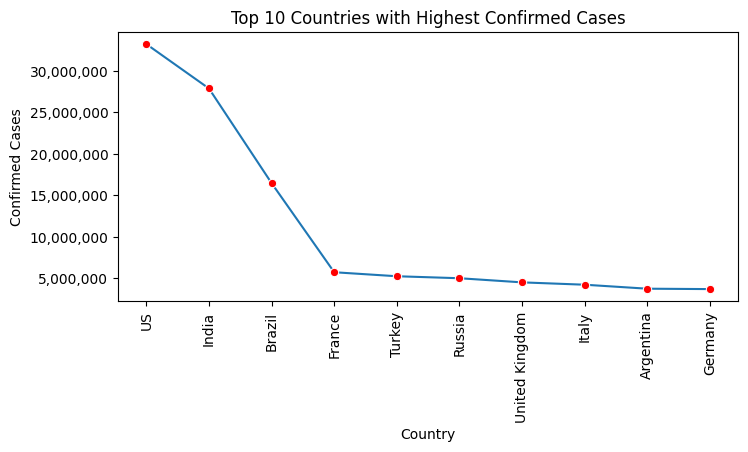

In [54]:
# lineplot has categorical x axis. Trends over continuous x-axis.
fig1 = plt.figure(figsize=(8, 3.5))
ax = sns.lineplot(data = top_cases, marker='o', markerfacecolor='red', markersize=6) # Refers to the axes object of your plot, which contains the x and y axes.
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xticks(rotation=90)
# To avoid exponential notation on y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # x: The value of the tick.
#"{:,}".format(int(x)): Formats the tick value as an integer with commas as thousand separators (e.g., 10000 becomes "10,000")
plt.show()
plt.close()

<ipython-input-55-1278901791>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_cases.index, y = top_cases.values, palette='Blues_r') # note it is sns.barplot()


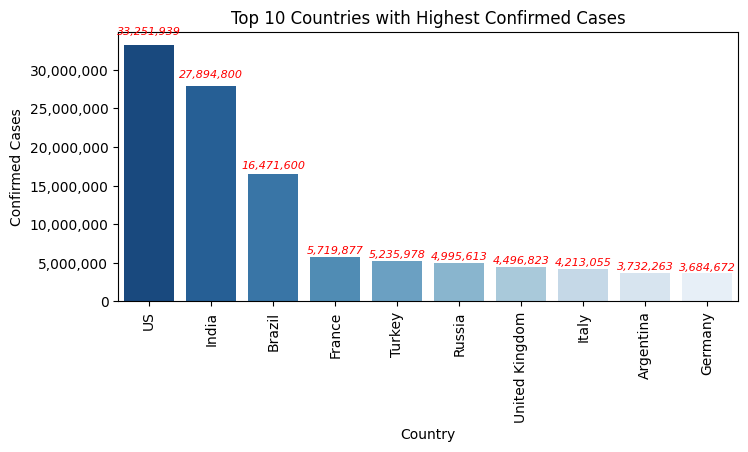

In [55]:
#Comparing discrete categories (like countries ex. this case)
fig2 = plt.figure(figsize=(8,3.5))
ax = sns.barplot(x = top_cases.index, y = top_cases.values, palette='Blues_r') # note it is sns.barplot()
# Blues_r gives dark to low color, Blues only will give light to dark.

# Add y-axis count labels on bars
for i, value in enumerate(top_cases.values):
    ax.text(i, value + (value * 0.03), f"{value:,}", ha='center', va='bottom', fontsize=8, color='red', fontstyle='italic') # fontweight='bold'
# value + (value * 0.03) -> Label Placement -> Moves text slightly higher to prevent overlap

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # to avoid exponentioal numbers on y axis

plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with Highest Confirmed Cases')
plt.xticks(rotation=90)
plt.show()
plt.close()

Q2.3: Generate plots of confirmed cases over time for China.

In [56]:
china_data = confirmed_case_data[confirmed_case_data['Country/Region'] == 'China'].iloc[:,4:].sum()
china_data # series indexed by dates. need to covert to dataframe for transpose

,0
22/Jan/2020,548
23/Jan/2020,643
24/Jan/2020,920
25/Jan/2020,1406
26/Jan/2020,2075
...,...
25/May/2021,102905
26/May/2021,102925
27/May/2021,102932
28/May/2021,102948


***China daily cases plot***

In [57]:
fig1 = plt.figure(figsize=(200, 100))
ax = sns.lineplot(data = china_data)
plt.xlabel('Dates')
plt.ylabel('Confirmed Cases')
plt.title('China confirmed case data of overtime (daily)')
plt.xticks(rotation=90)
# To avoid exponential notation on y-axis
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()
plt.close()

Since it is not very clear, we will draw graph for china confirmed cases on monthly basis.

Approach --> we already have china_data series with dates as label and column as cases on that day. ->
We will just convert date to month/year and so get last date of each month because that will have cumulative/total cases of that month. ->
And then plot the graph.

In [58]:
#china_data indexes must be in datetime format to format to mon/year
china_data.index = pd.to_datetime(china_data.index, format='%d/%b/%Y') # converts index values (dates) to ISO format as Y-m-d
# now we want maximum date of each month, so first create group on basis on month/year and then find maximum date for different groups.
month_end_indexes = china_data.groupby(china_data.index.to_period('M')).idxmax() # note we have took the index and filtered it so they are less than actual index in china_data.
china_month_data = china_data[month_end_indexes]
china_month_data

,0
2020-01-31,9802
2020-02-29,79356
2020-03-31,82279
2020-04-30,83956
2020-05-31,84146
2020-06-30,84785
2020-07-31,87655
2020-08-31,89914
2020-09-30,90545
2020-10-31,91366


In [59]:
# convert it to %d/%b/%Y format for easy interpretation.
print(china_month_data.index.dtype)
china_month_data.index = china_month_data.index.strftime('%d/%b/%Y')
china_month_data

datetime64[ns]


,0
31/Jan/2020,9802
29/Feb/2020,79356
31/Mar/2020,82279
30/Apr/2020,83956
31/May/2020,84146
30/Jun/2020,84785
31/Jul/2020,87655
31/Aug/2020,89914
30/Sep/2020,90545
31/Oct/2020,91366


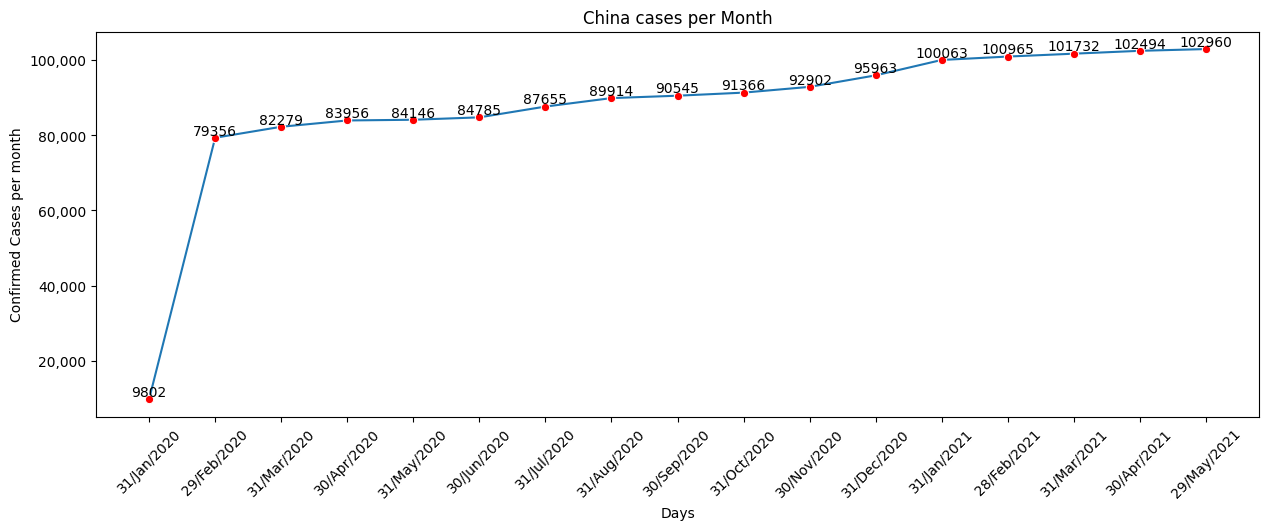

In [60]:
fig3 = plt.figure(figsize=(15,5))
axo = sns.lineplot(data = china_month_data, marker='o', markerfacecolor='red', markersize=6) # Refers to the axes object of your plot, which contains the x and y axes.
# To avoid exponential notation on y-axis
axo.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # x: The value of the tick.
#"{:,}".format(int(x)): Formats the tick value as an integer with commas as thousand separators (e.g., 10000 becomes "10,000")
# Add number annotations at each marker
for i, value in enumerate(china_month_data):
    axo.text(i, value, f"{value:.0f}", fontsize=10, ha='center', va='bottom', color='black')

plt.xlabel('Days')
plt.ylabel('Confirmed Cases per month')
plt.title('China cases per Month')
plt.xticks(rotation=45)
plt.savefig('china_cases_per_day.png')
plt.show()
plt.close()

# if you are giving two times sns.lineplot teling dataframe in one and attributes in another, it will lead next grapgh to catch first graph data.

Q5.1: Analyze the peak number of daily new cases in Germany, France, and Italy. Which country experienced the highest single-day surge, and when did it occur?

Ans: Approach: Group data for these 3 countries. Then find the maximum different between consecutive days. Then plot graph of all 3 countries.

In [61]:
#getting data for 3 countries with all their provinces sum
country_data = confirmed_case_data[confirmed_case_data['Country/Region'].isin(['Germany', 'France', 'Italy'])]
country_data = country_data.groupby('Country/Region').sum().drop(columns=['Province/State', 'Latitude', 'Longitude'])
country_data

,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,28/Jan/2020,29/Jan/2020,30/Jan/2020,31/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,2,3,3,3,4,5,5,5,...,5629983,5642786,5655397,5665101,5667331,5670486,5683143,5697076,5708350,5719877
Germany,0,0,0,0,0,1,4,4,4,5,...,3638504,3646600,3653019,3657662,3659990,3662568,3667041,3673990,3680159,3684672
Italy,0,0,0,0,0,0,0,0,0,2,...,4178261,4183476,4188190,4192183,4194672,4197892,4201827,4205970,4209707,4213055


In [62]:
# getting unique cases per day.
for country in country_data.index:
  row_index = country_data.index.get_loc(country) # you will get row index of france, germany, italy.
  previous_day_cases = country_data.iloc[row_index, 0]
  for col in range(1, len(country_data.columns)):
    current_day_cases = country_data.iloc[row_index, col]
    unique_cases = current_day_cases - previous_day_cases
    previous_day_cases = current_day_cases
    country_data.iloc[row_index, col] = unique_cases
    col += 1
country_data

,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,28/Jan/2020,29/Jan/2020,30/Jan/2020,31/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,2,1,0,0,1,1,0,0,...,-348667,12803,12611,9704,2230,3155,12657,13933,11274,11527
Germany,0,0,0,0,0,1,3,0,0,1,...,10727,8096,6419,4643,2328,2578,4473,6949,6169,4513
Italy,0,0,0,0,0,0,0,0,0,2,...,5736,5215,4714,3993,2489,3220,3935,4143,3737,3348


We can see though it is a cummulative data, we have few -ve values, which means the previous day cases were more than the current day, so the data is not actually cummulative. We need to impute the -ve cases with the interpolation.

Hence we will convert -ve values to Nan and then interpolate it.

In [63]:
# Replace negative values with NaN
country_data[country_data < 0] = np.nan

# interpolation via method=polynomial requires index to be in numeric or datetime.
# Here we are interpolating across column, so column names should be numeric or datetime.
country_name_columns = country_data.columns
country_data.columns = range(len(country_data.columns))

country_data = country_data.interpolate(method = 'polynomial', order=3, axis=1) # since we want to interpolate across column values.
country_data.columns = country_name_columns

# Ensure all imputed values are integers
country_data = country_data.round().astype('Int64')
country_data

,22/Jan/2020,23/Jan/2020,24/Jan/2020,25/Jan/2020,26/Jan/2020,27/Jan/2020,28/Jan/2020,29/Jan/2020,30/Jan/2020,31/Jan/2020,...,20/May/2021,21/May/2021,22/May/2021,23/May/2021,24/May/2021,25/May/2021,26/May/2021,27/May/2021,28/May/2021,29/May/2021
Country/Region,,,,,,,,,,,,,,,,,,,,,
France,0,0,2,1,0,0,1,1,0,0,...,15284,12803,12611,9704,2230,3155,12657,13933,11274,11527
Germany,0,0,0,0,0,1,3,0,0,1,...,10727,8096,6419,4643,2328,2578,4473,6949,6169,4513
Italy,0,0,0,0,0,0,0,0,0,2,...,5736,5215,4714,3993,2489,3220,3935,4143,3737,3348


In [64]:
countrys_max_cases = country_data.max(axis=1) # Get max value for each row i.e., compare (do operation) across columns.
max_case_column_date = country_data.idxmax(axis=1)  # Get column name with max value

# Create a result DataFrame
result_df = pd.DataFrame({'Max cases': countrys_max_cases, 'Date': max_case_column_date})

for country in result_df.index:
  print(f'The maximum cases for {country} were reported on {result_df.loc[country, "Date"]} and it was: {result_df.loc[country, "Max cases"]}', end='\n\n')

The maximum cases for France were reported on 11/Apr/2021 and it was: 117900

The maximum cases for Germany were reported on 30/Dec/2020 and it was: 49044

The maximum cases for Italy were reported on 13/Nov/2020 and it was: 40902



Lets try to plot it over a line graph but on monthy data basis because on daily basis it will be difficult to see.

But still we can watch month in which the cases were maximum.

In [65]:
# Convert column names to datetime format
country_data.columns = pd.to_datetime(country_data.columns, format="%d/%b/%Y")

# Group by month and aggregate (e.g., sum)
monthly_country_data = country_data.resample('M', axis=1).sum()  # 'M' means monthly grouping

# Rename columns to "%b/%Y" format
monthly_country_data.columns = monthly_country_data.columns.strftime('%b/%Y')

monthly_country_data

<ipython-input-65-2110745482>:5: FutureWarning: DataFrame.resample with axis=1 is deprecated. Do `frame.T.resample(...)` without axis instead.
  monthly_country_data = country_data.resample('M', axis=1).sum()  # 'M' means monthly grouping
<ipython-input-65-2110745482>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_country_data = country_data.resample('M', axis=1).sum()  # 'M' means monthly grouping


,Jan/2020,Feb/2020,Mar/2020,Apr/2020,May/2020,Jun/2020,Jul/2020,Aug/2020,Sep/2020,Oct/2020,Nov/2020,Dec/2020,Jan/2021,Feb/2021,Mar/2021,Apr/2021,May/2021
Country/Region,,,,,,,,,,,,,,,,,
France,5,95,52178,152186,22842,25910,22995,93921,284733,808471,963561,400792,578254,559719,889429,972767,405993
Germany,5,74,71729,91201,20401,12008,14981,34403,48111,238877,538122,690608,465139,224636,393349,561721,279307
Italy,2,1126,104664,99671,27534,8032,6959,21677,45647,364569,922124,505612,445866,372233,659634,437754,190402


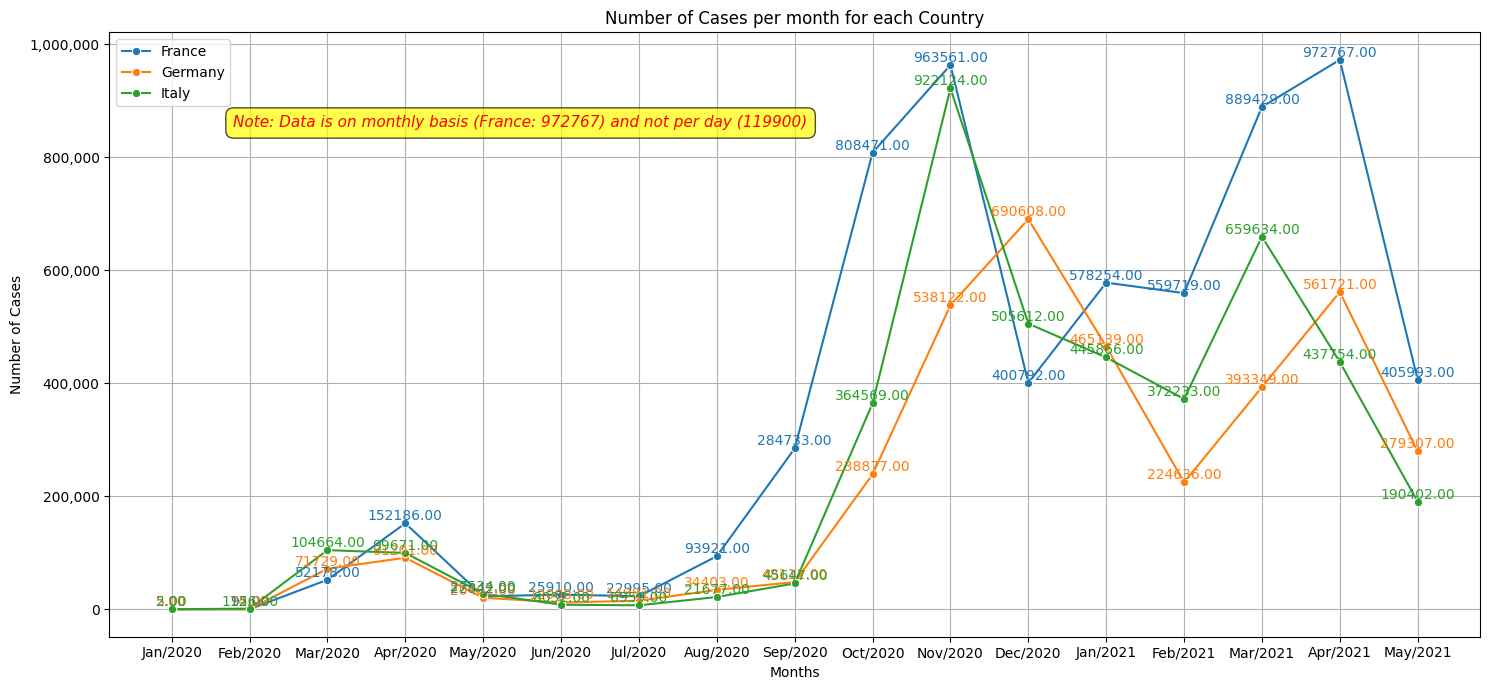

In [66]:
fig = plt.figure(figsize=(15, 7))
palette = sns.color_palette(n_colors=len(monthly_country_data.columns))
ax = fig.add_subplot(111) # to explicitly create an Axes object for plotting on a figure. 111 stands for a single subplot (1 row × 1 column, first subplot).

for idx, country in enumerate(monthly_country_data.index):
    sns.lineplot(x=monthly_country_data.columns,
                 y=monthly_country_data.loc[country],
                 marker='o',
                 markersize=6,
                 label=country,
                 color=palette[idx],
                 ax=ax)
    # Add number annotations at each marker with the same color
    for i, value in enumerate(monthly_country_data.loc[country]):
        ax.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom', color=palette[idx])

ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Add a note in a yellow box with red, italic text
ax.text(0.3, 0.85, 'Note: Data is on monthly basis (France: 972767) and not per day (119900)',
         transform=ax.transAxes, ha='center', va='center',
         fontdict={'color': 'red', 'style': 'italic', 'size': 11},
         bbox=dict(facecolor='yellow', edgecolor='black', alpha=0.7, boxstyle='round,pad=0.5'))

plt.xlabel('Months')
plt.ylabel('Number of Cases')
plt.title('Number of Cases per month for each Country')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Q6.2: What is the total number of deaths reported per country up to the current date?

In [67]:
country_based_death_data = death_data.groupby('Country/Region').sum()
last_day_deaths = country_based_death_data.iloc[:, -1]  # Use iloc for last column selection presuming data is cummulative.
top_deaths_countries = last_day_deaths.sort_values(ascending=False).head(10)
top_deaths_countries

,29/May/2021
Country/Region,
US,594306
Brazil,461057
India,325972
Mexico,223455
United Kingdom,128037
Italy,126002
Russia,118781
France,109518
Germany,88413


<ipython-input-68-2023544071>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = top_deaths_countries.index, y = top_deaths_countries.values, palette='coolwarm_r')


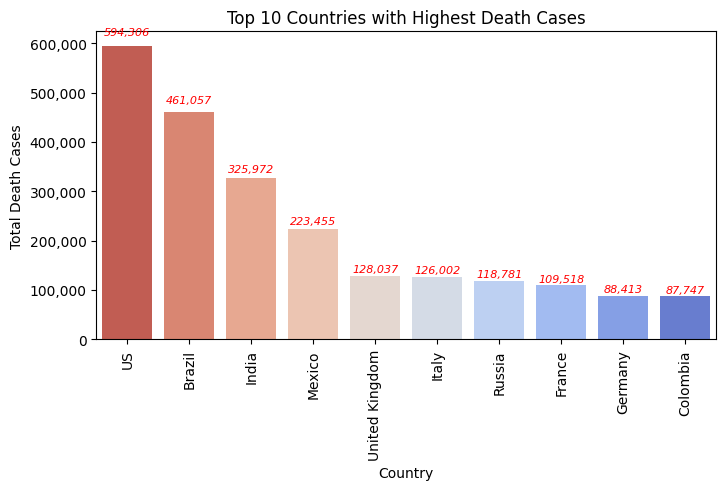

In [68]:
#Comparing discrete categories (like countries)
fig5 = plt.figure(figsize=(8,4))
ax = sns.barplot(x = top_deaths_countries.index, y = top_deaths_countries.values, palette='coolwarm_r')

# Add y-axis count labels on bars
for i, value in enumerate(top_deaths_countries.values):
    ax.text(i, value + (value * 0.03), f"{value:,}", ha='center', va='bottom', fontsize=8, color='red', fontstyle='italic') # fontweight='bold'
# value + (value * 0.03) -> Label Placement -> Moves text slightly higher to prevent overlap
plt.xlabel('Country')
plt.ylabel('Total Death Cases')
plt.title('Top 10 Countries with Highest Death Cases')
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()
plt.close()

Q6.3: What are the top 5 countries with the highest average daily deaths?

Ans: Approach: average means total deaths divide by days. Total deaths is in last column which when divided by total days gives average deaths.

In [69]:
country_based_death_data = death_data.groupby('Country/Region').sum()
last_day_deaths = country_based_death_data.iloc[:, -1]  # Use iloc for last column selection presuming data is cummulative.
top_deaths_countries = last_day_deaths.sort_values(ascending=False).head(5)

date_columns = death_data.columns[4:]

top_avg_deaths_countries = top_deaths_countries / (len(date_columns))
top_avg_deaths_countries

,29/May/2021
Country/Region,
US,1203.048583
Brazil,933.313765
India,659.862348
Mexico,452.338057
United Kingdom,259.184211


Q5.3: What is the distribution of death rates (deaths/confirmed cases) among provinces in Canada? Identify the province with the highest and lowest death
rate as of the latest data point.

Ans: Approach:
`Confirmed case data -> pick only Canada as country with its provinces`

`Death case data ->   pick only Canada as country with its provinces`

`Do division for death rate ->  Confirmed case data / Death case data`

`Plot`

In [70]:
canada_confirmed_case = confirmed_case_data[confirmed_case_data['Country/Region'] == "Canada"]
canada_confirmed_case_data = canada_confirmed_case.set_index('Province/State').iloc[:,-1]

canada_death_case = death_data[death_data['Country/Region'] == "Canada"]
canada_death_case_data = canada_death_case.set_index('Province/State').iloc[:,-1]
canada_death_case_data

canada_death_rate = (canada_death_case_data/canada_confirmed_case_data)*100
canada_death_rate

# but death rate can be infinity if 0/n for no case but died. Or 0/0 means no case no death.
# Impute inf values with 0
canada_death_rate = canada_death_rate.replace([np.inf, -np.inf], 0)
canada_death_rate

#Ex For Alberta = 2214 deaths/226855cases = 0.97% means less than 1% death rate.
# Meaning among 100 people there is a chance that 1 person can die.

,29/May/2021
Province/State,
Alberta,0.975954
British Columbia,1.178429
Diamond Princess,0.000000
Grand Princess,0.000000
Manitoba,2.069348
New Brunswick,1.962574
Newfoundland and Labrador,0.460829
Northwest Territories,0.000000
Nova Scotia,1.518987


<ipython-input-71-1335899005>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = canada_death_rate.index, y = canada_death_rate.values, palette='RdPu')


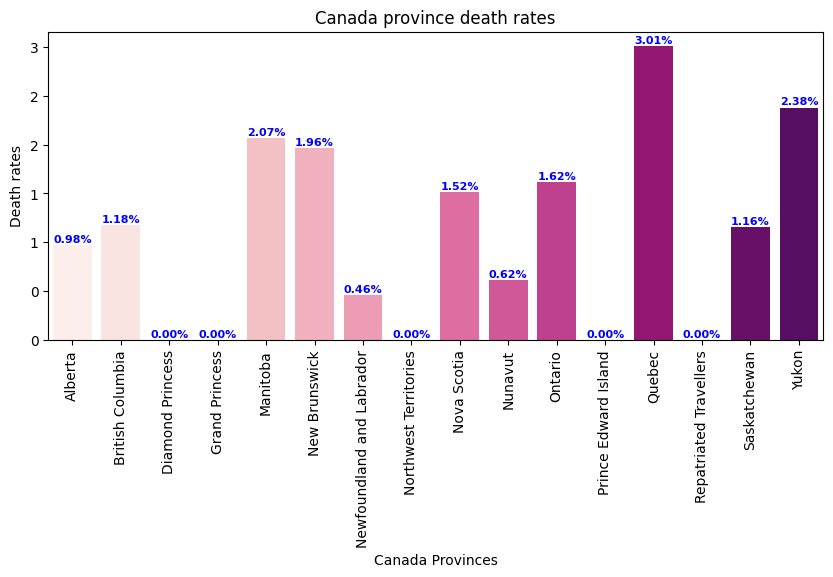

In [71]:
#Comparing discrete categories (like countries)
fig5 = plt.figure(figsize=(10,4))
ax = sns.barplot(x = canada_death_rate.index, y = canada_death_rate.values, palette='RdPu')

# Add y-axis count labels on bars
for i, value in enumerate(canada_death_rate.values):
    ax.text(i, value + (value * 0.005), f"{value:.2f}%", ha='center', va='bottom', fontsize=8, color='blue', fontweight='bold') # fontstyle='italic'
# value + (value * 0.03) -> Label Placement -> Moves text slightly higher to prevent overlap
plt.xlabel('Canada Provinces')
plt.ylabel('Death rates')
plt.title('Canada province death rates')
plt.xticks(rotation=90)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()
plt.close()

Q6.4: How have the total deaths evolved over time in the United States?

Ans: Actually it is asking trend of deaths in US overtime. So, we will plot for month wise deaths for US and see if the deaths increased or decresed (i.e., evolution)

In [72]:
US_data = death_data[death_data['Country/Region'] == 'US'].drop(columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum()
US_data.name = 'US_cases' # renaming the series column.
US_data # it is series with index as dates.

#converting to months and summing for each month
US_data.index = pd.to_datetime(US_data.index, format='%d/%b/%Y').strftime('%m/%Y')
US_data.index = pd.to_datetime(US_data.index, format='%m/%Y')
US_cases_monthly_series = US_data.groupby(US_data.index).sum() # data will not be in date chronological order.
US_cases_monthly_series = US_cases_monthly_series.sort_index()

US_cases_monthly_series.index = pd.to_datetime(US_cases_monthly_series.index, format='%m/%Y').strftime('%b/%Y')
US_cases_monthly_series

,US_cases
Jan/2020,0
Feb/2020,1
Mar/2020,25980
Apr/2020,1070244
May/2020,2802993
Jun/2020,3574559
Jul/2020,4328108
Aug/2020,5269479
Sep/2020,5889056
Oct/2020,6796591


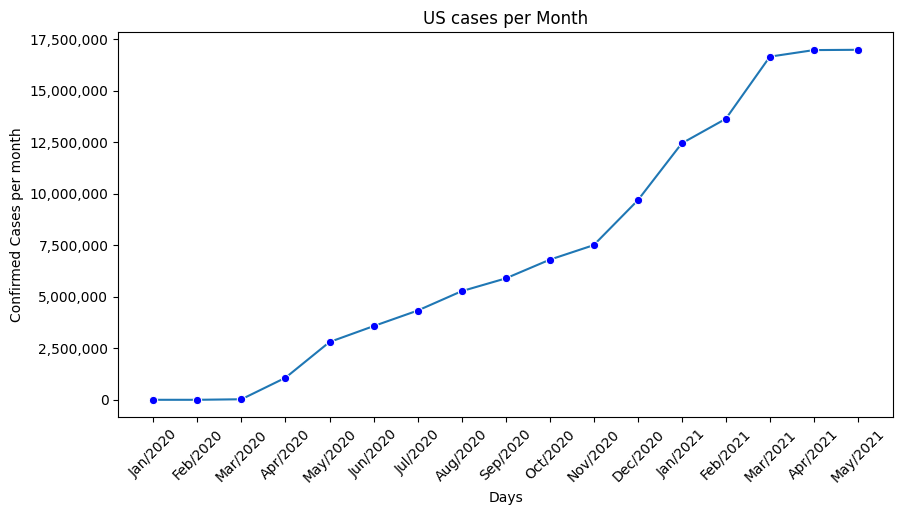

In [73]:
# lineplot has categorical x axis.
fig7 = plt.figure(figsize=(10,5))
axo = sns.lineplot(data = US_cases_monthly_series, marker='o', markerfacecolor='blue', markersize=6) #
axo.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases per month')
plt.title('US cases per Month')
plt.xticks(rotation=45)
plt.savefig('china_cases_per_day.png')
plt.show()

# if you are giving two times sns.lineplot to use data in one and attributes in another, it will lead next grapgh to catch first graph data.

Q5.2: Compare the recovery rates (recoveries/confirmed cases) between Canada and Australia as of December 31, 2020. Which country showed better management of the
pandemic according to this metric?

In [74]:
#Canada positive data
canada_confirm_case_data = confirmed_case_data[confirmed_case_data['Country/Region'] == 'Canada']
canada_confirm_case_data_series = canada_confirm_case_data.drop(columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum()
#sums column-wise means for each date column, it sums across all provinces in Canada.
canada_case_31Dec2020 = canada_confirm_case_data_series.loc['31/Dec/2020']
print(f'canada confirmed case on 31dec 2020 is {canada_case_31Dec2020}')

#Canada recovery data
canada_recovery_case_data = recovered_case_data[recovered_case_data['Country/Region'] == 'Canada']
canada_recovery_case_data_series = canada_recovery_case_data.drop(columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum()
canada_recovery_case_31Dec2020 = canada_recovery_case_data_series.loc['31/Dec/2020']
print(f'canada confirmed case on 31dec 2020 is {canada_recovery_case_31Dec2020}')

canada_recovery_rate = (canada_recovery_case_31Dec2020/canada_case_31Dec2020)*100
print(f'canada recovery rate is {canada_recovery_rate}')

canada confirmed case on 31dec 2020 is 584409
canada confirmed case on 31dec 2020 is 493638
canada recovery rate is 84.46789833832128


In [75]:
#Australia positive data
australia_confirm_case_data = confirmed_case_data[confirmed_case_data['Country/Region'] == 'Australia']
australia_confirm_case_data_series = australia_confirm_case_data.drop(columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum()
#sums column-wise means for each date column, it sums across all provinces in Australia.
australia_case_31Dec2020 = australia_confirm_case_data_series.loc['31/Dec/2020']
print(f'Australia confirmed case on 31dec 2020 is {australia_case_31Dec2020}')

#Australia recovery data
australia_recovery_case_data = recovered_case_data[recovered_case_data['Country/Region'] == 'Australia']
australia_recovery_case_data_series = australia_recovery_case_data.drop(columns=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum()
australia_recovery_case_31Dec2020 = australia_recovery_case_data_series.loc['31/Dec/2020']
print(f'Australia confirmed case on 31dec 2020 is {australia_recovery_case_31Dec2020}')

australia_recovery_rate = (australia_recovery_case_31Dec2020/australia_case_31Dec2020)*100
print(f'australia recovery rate is {australia_recovery_rate}')

Australia confirmed case on 31dec 2020 is 28425
Australia confirmed case on 31dec 2020 is 22565
australia recovery rate is 79.38434476693051


<ipython-input-76-2009475978>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = ['Canada', 'Australis'], y = [canada_recovery_rate, australia_recovery_rate], palette='Set2')


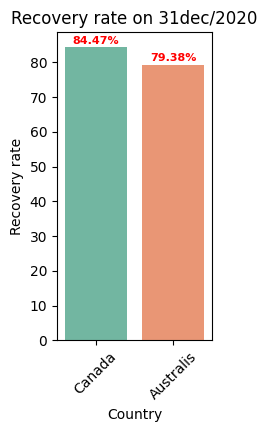

In [76]:
#Comparing discrete categories (like countries)
fig8 = plt.figure(figsize=(2,4))
ax = sns.barplot(x = ['Canada', 'Australis'], y = [canada_recovery_rate, australia_recovery_rate], palette='Set2')
# Add y-axis count labels on bars
for i, value in enumerate([canada_recovery_rate, australia_recovery_rate]):
    ax.text(i, value + (value * 0.005), f"{value:.2f}%", ha='center', va='bottom', fontsize=8, color='red', fontweight='bold') # fontstyle='italic'
plt.xlabel('Country')
plt.ylabel('Recovery rate')
plt.title('Recovery rate on 31dec/2020')
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()
plt.close()

Hence we can see Canada government managed well for the recovery from the pendamic for day 31 Dec 2020 from the given metrics.

# **Merging of Data sets and Analysis**

Q6.1: Transform the 'deaths' dataset from wide format (where each column represents a date) to long format, where each row represents a single date,
ensuring that the date column is in datetime format. How would this transformation be executed?

Ans: Wide form (where each date is a separate column). Lonf form long format (where all dates are in a single "Date" column). So for each country, province, long, lat there will be 494 rows (date columns count in original df). ANd there are 276 rows so 276*(498-4) = 13,63,44 total rows will come in long form. We are not performing any column wise province sum here.

This transformation makes time-series analysis much easier.

In [77]:
deaths_data_long = pd.melt(
    death_data,
    id_vars=['Country/Region', 'Province/State', 'Latitude', 'Longitude'], # remains unchanged
    var_name='Date', # columns except id_vars will be made as 1 column, its name.
    value_name='Deaths' # values that were originally spread across multiple date columns
)
deaths_data_long['Date'] = pd.to_datetime(deaths_data_long['Date'], format='%d/%b/%Y')
print(f'shape of original deaths_data_wide {death_data.shape}')
print(f'shape of deaths_data_long {deaths_data_long.shape}')
print(f"type of date column : {deaths_data_long['Date'].dtype}", end = '\n\n')

deaths_data_long

shape of original deaths_data_wide (276, 498)
shape of deaths_data_long (136344, 6)
type of date column : datetime64[ns]



,Country/Region,Province/State,Latitude,Longitude,Date,Deaths
0,Afghanistan,All Provinces,33.939110,67.709953,2020-01-22,0
1,Albania,All Provinces,41.153300,20.168300,2020-01-22,0
2,Algeria,All Provinces,28.033900,1.659600,2020-01-22,0
3,Andorra,All Provinces,42.506300,1.521800,2020-01-22,0
4,Angola,All Provinces,-11.202700,17.873900,2020-01-22,0
...,...,...,...,...,...,...
136339,Vietnam,All Provinces,14.058324,108.277199,2021-05-29,47
136340,West Bank and Gaza,All Provinces,31.952200,35.233200,2021-05-29,3492
136341,Yemen,All Provinces,15.552727,48.516388,2021-05-29,1319
136342,Zambia,All Provinces,-13.133897,27.849332,2021-05-29,1276


If you are getting less number of rows after tranforming into long form, here are few checks to be done. Note that pd.melt() drops rows if there are any NaN values, or the column names contains white spaces. But it does not drop rows for 0 values.

In [78]:
# IGNORE (NOT NEEDED ANYMORE)

print("check if Expected Row Count 'equals' actual row count: ", death_data.shape[0] * (death_data.shape[1]-4), "==", deaths_data_long.shape[0])  # (subtracting non-date columns)

print(f'sum of duplicate rows {death_data.duplicated().sum()}') # No duplicates also.
print("Duplicate rows:", death_data.duplicated(subset=['Country/Region', 'Province/State', 'Latitude', 'Longitude']).sum())

death_data_date_cols = death_data.columns.difference(['Country/Region', 'Province/State', 'Latitude', 'Longitude'])
print(f'length of date columns in original death_data: {len(death_data_date_cols)}')
print("Unique Dates in Long Data:", deaths_data_long['Date'].nunique())

all_zero_rows = (death_data[death_data_date_cols] == 0).all(axis=1).sum()
print("Rows with all zeros:", all_zero_rows, end = '\n\n')

original_keys = set(zip(death_data['Country/Region'], death_data['Province/State'], death_data['Latitude'], death_data['Longitude']))
melted_keys = set(zip(deaths_data_long['Country/Region'], deaths_data_long['Province/State'], deaths_data_long['Latitude'], deaths_data_long['Longitude']))
print("Rows missing after melt:", original_keys - melted_keys)

check if Expected Row Count 'equals' actual row count:  136344 == 136344
sum of duplicate rows 0
Duplicate rows: 0
length of date columns in original death_data: 494
Unique Dates in Long Data: 494
Rows with all zeros: 24

Rows missing after melt: set()


Q7.1: How would you merge the transformed datasets of confirmed cases, deaths, and recoveries on the 'Country/Region' and 'Date' columns to create a
comprehensive view of the pandemic's impact?

Ans: First we will convert other 2 dataset to long form and that data we will convert it to at the country and date level, you should aggregate your data so that each row represents the total deaths for a country on a specific date.

In [79]:
confirmed_case_data_long = pd.melt(
    confirmed_case_data, # original dataset name
    id_vars=['Country/Region', 'Province/State', 'Latitude', 'Longitude'], # remains unchanged
    var_name='Date',
    value_name='confirmed_cases' # values that were originally spread across multiple date columns
)
confirmed_case_data_long['Date'] = pd.to_datetime(confirmed_case_data_long['Date'], format='%d/%b/%Y')
print("check if Expected Row Count 'equals' actual row count: ", confirmed_case_data.shape[0] * (confirmed_case_data.shape[1]-4), "==", confirmed_case_data_long.shape[0])
print(f'confirmed_case_data_long.shape {confirmed_case_data_long.shape}', end = '\n\n')

recovered_case_data_long = pd.melt(
    recovered_case_data,
    id_vars=['Country/Region', 'Province/State', 'Latitude', 'Longitude'], # remains unchanged
    var_name='Date',
    value_name='recovered_cases' # values that were originally spread across multiple date columns
)
recovered_case_data_long['Date'] = pd.to_datetime(recovered_case_data_long['Date'], format='%d/%b/%Y')
print("check if Expected Row Count 'equals' actual row count: ", recovered_case_data.shape[0] * (recovered_case_data.shape[1]-4), "==", recovered_case_data_long.shape[0])
print(f'recovered_case_data_long.shape {recovered_case_data_long.shape}')

check if Expected Row Count 'equals' actual row count:  136344 == 136344
confirmed_case_data_long.shape (136344, 6)

check if Expected Row Count 'equals' actual row count:  128934 == 128934
recovered_case_data_long.shape (128934, 6)


You can see that the recovered_case_data_long has less rows than the other two datasets.

In [80]:
# This gives you the total deaths per country "per day", regardless of province/state. Summing for per day.
country_date_confirmed = confirmed_case_data_long.groupby(['Country/Region', 'Date'])['confirmed_cases'].sum().reset_index()
print(f'shape of country_date_confirmed is {country_date_confirmed.shape}')

country_date_deaths = deaths_data_long.groupby(['Country/Region', 'Date'])['Deaths'].sum().reset_index()
print(f'shape of country_date_deaths is {country_date_deaths.shape}')

country_date_revovered = recovered_case_data_long.groupby(['Country/Region', 'Date'])['recovered_cases'].sum().reset_index()
print(f'shape of country_date_revovered is {country_date_revovered.shape}', end='\n\n')
country_date_revovered

shape of country_date_confirmed is (95342, 3)
shape of country_date_deaths is (95342, 3)
shape of country_date_revovered is (95342, 3)



,Country/Region,Date,recovered_cases
0,Afghanistan,2020-01-22,0
1,Afghanistan,2020-01-23,0
2,Afghanistan,2020-01-24,0
3,Afghanistan,2020-01-25,0
4,Afghanistan,2020-01-26,0
...,...,...,...
95337,Zimbabwe,2021-05-25,36517
95338,Zimbabwe,2021-05-26,36531
95339,Zimbabwe,2021-05-27,36541
95340,Zimbabwe,2021-05-28,36563


Now merging the 3 data sets in long form.

In [81]:
# Merge confirmed and deaths
merged = pd.merge(
    country_date_confirmed,
    country_date_deaths,
    on=['Country/Region', 'Date'],
    how='outer'       # how='outer' ensures you keep all country-date combinations, even if one DataFrame is missing a value for that pair
)

# Merge with recovered
dataset_merged_country_date  = pd.merge(
    merged,
    country_date_revovered,
    on=['Country/Region', 'Date'],
    how='outer'
)
print(f'shape of dataset_merged_country_date is {dataset_merged_country_date.shape}', end='\n\n')
dataset_merged_country_date

shape of dataset_merged_country_date is (95342, 5)



,Country/Region,Date,confirmed_cases,Deaths,recovered_cases
0,Afghanistan,2020-01-22,0,0,0
1,Afghanistan,2020-01-23,0,0,0
2,Afghanistan,2020-01-24,0,0,0
3,Afghanistan,2020-01-25,0,0,0
4,Afghanistan,2020-01-26,0,0,0
...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,1587,36517
95338,Zimbabwe,2021-05-26,38819,1589,36531
95339,Zimbabwe,2021-05-27,38854,1592,36541
95340,Zimbabwe,2021-05-28,38918,1592,36563


This merged DataFrame now provides a comprehensive, per-country per-day view of the pandemic’s impact and is ready for further analysis or visualization.

With further questions lets see how we can visualize using this merged long dataset.

*Q7.2: Analyze the monthly sum of confirmed cases, deaths, and recoveries for countries to understand the progression of the pandemic.[From the merged dataset]*


The monthly sum will be present in the last day of that month. Lets extract last day row for each country and see the pendemic progression.

In [82]:
# We already have dataset grouped by countries & dates. Means country per day data is ready.
# Extracting last day rows:
dataset_merged_country_date['Date'] = pd.to_datetime(dataset_merged_country_date['Date'], format='%Y/%m/%d')

# Create a temporary column for the month period
dataset_merged_country_date['Month'] = dataset_merged_country_date['Date'].dt.to_period('M')

# Group by 'Country' & 'month' and then find the last date of each month
country_last_day_data = dataset_merged_country_date.groupby(['Country/Region', 'Month'])['Date'].max().reset_index()

# when we do .groupby() and use .max() to get the last date of each month, we only keep the Country, Month, and Date columns,
# but the other columns (confirmed_case, deaths, recovered_case) are lost in the process. Hence we need to Merge with original DataFrame and only keep new df rows i.e inner merge.
country_last_day_data = dataset_merged_country_date.merge(country_last_day_data, how='inner')
country_last_day_data

,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,Afghanistan,2020-01-31,0,0,0,2020-01
1,Afghanistan,2020-02-29,1,0,0,2020-02
2,Afghanistan,2020-03-31,175,4,5,2020-03
3,Afghanistan,2020-04-30,2127,64,260,2020-04
4,Afghanistan,2020-05-31,15208,258,1328,2020-05
...,...,...,...,...,...,...
3276,Zimbabwe,2021-01-31,33388,1217,26044,2021-01
3277,Zimbabwe,2021-02-28,36089,1463,32666,2021-02
3278,Zimbabwe,2021-03-31,36882,1523,34686,2021-03
3279,Zimbabwe,2021-04-30,38257,1567,35612,2021-04


lets use above data to see India trends

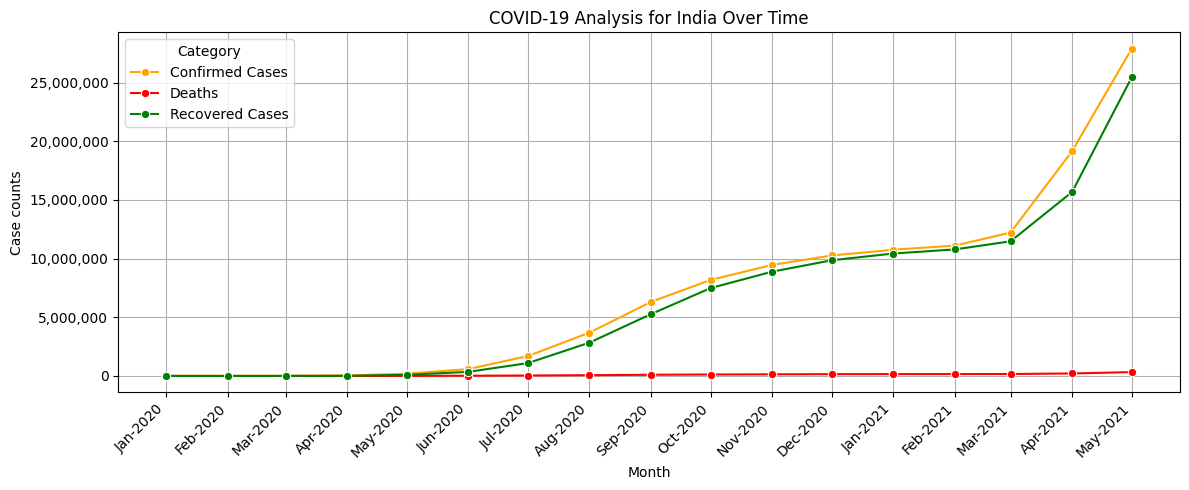

In [83]:
# Filter India data and sort by month
india_monthly = country_last_day_data[country_last_day_data['Country/Region'] == 'India'].drop(columns=['Country/Region', 'Date'])
india_monthly = india_monthly.sort_values('Month').set_index('Month')
india_monthly.index = india_monthly.index.to_timestamp()

# Plot the lineplot
fig, ax = plt.subplots(figsize=(12,5))
colors = {"confirmed_cases": "orange", "Deaths": "red", "recovered_cases": "green"}

# Plot each line with specific color and marker
for column in india_monthly.columns:
    sns.lineplot(data=india_monthly, x=india_monthly.index, y=india_monthly[column],
                 ax=ax, label=column.replace("_", " ").title(), color=colors[column], marker="o")

# Format y-axis labels with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set all Month labels explicitly
ax.set_xticks(india_monthly.index)  # Use all months as ticks
ax.set_xticklabels(india_monthly.index.strftime('%b-%Y'), rotation=45, ha='right')  # Rotate for better readability

plt.xlabel("Month")
plt.ylabel("Case counts")
plt.title("COVID-19 Analysis for India Over Time")
plt.legend(title="Category")
plt.grid(True)
plt.tight_layout()
plt.show()
plt.close()

Q7.3: Redo the analysis in Question 7.2 for the United States, Italy, and Brazil.

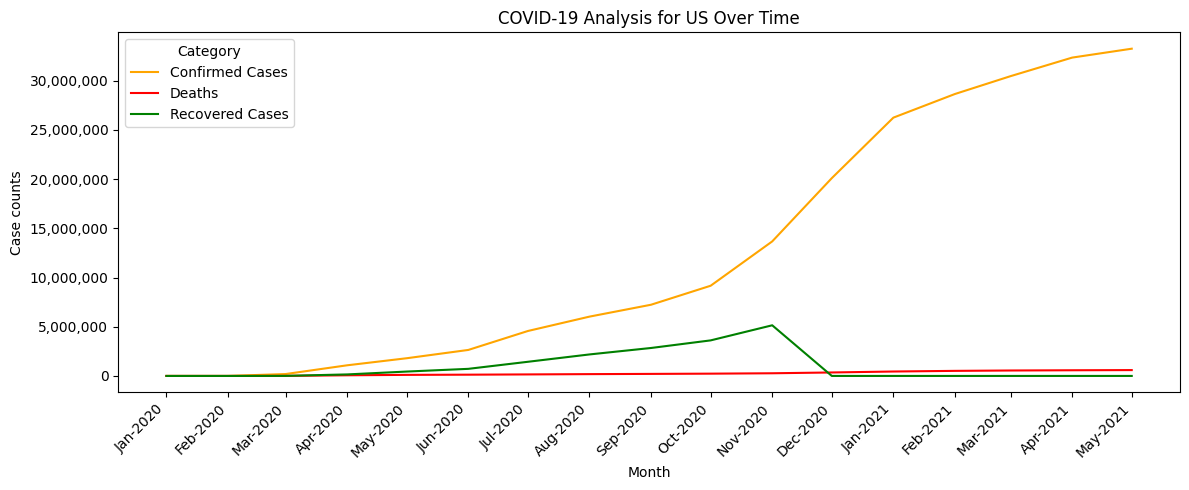

In [84]:
# Filter US data and sort by month
US_monthly = country_last_day_data[country_last_day_data['Country/Region'] == 'US'].drop(columns=['Country/Region', 'Date'])
US_monthly = US_monthly.sort_values('Month').set_index('Month')
US_monthly.index = US_monthly.index.to_timestamp()

# Plot the lineplot
fig, ax = plt.subplots(figsize=(12,5))
colors = {"confirmed_cases": "orange", "Deaths": "red", "recovered_cases": "green"}

# Plot each line with specific color and marker
for column in US_monthly.columns:
    sns.lineplot(data=US_monthly, x=US_monthly.index, y=US_monthly[column],
                 ax=ax, label=column.replace("_", " ").title(), color=colors[column])

# Format y-axis labels with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set all Month labels explicitly
ax.set_xticks(US_monthly.index)  # Use all months as ticks
ax.set_xticklabels(US_monthly.index.strftime('%b-%Y'), rotation=45, ha='right')  # Rotate for better readability

plt.xlabel("Month")
plt.ylabel("Case counts")
plt.title("COVID-19 Analysis for US Over Time")
plt.legend(title="Category")
plt.grid(False)
plt.tight_layout()
plt.show()
plt.close()

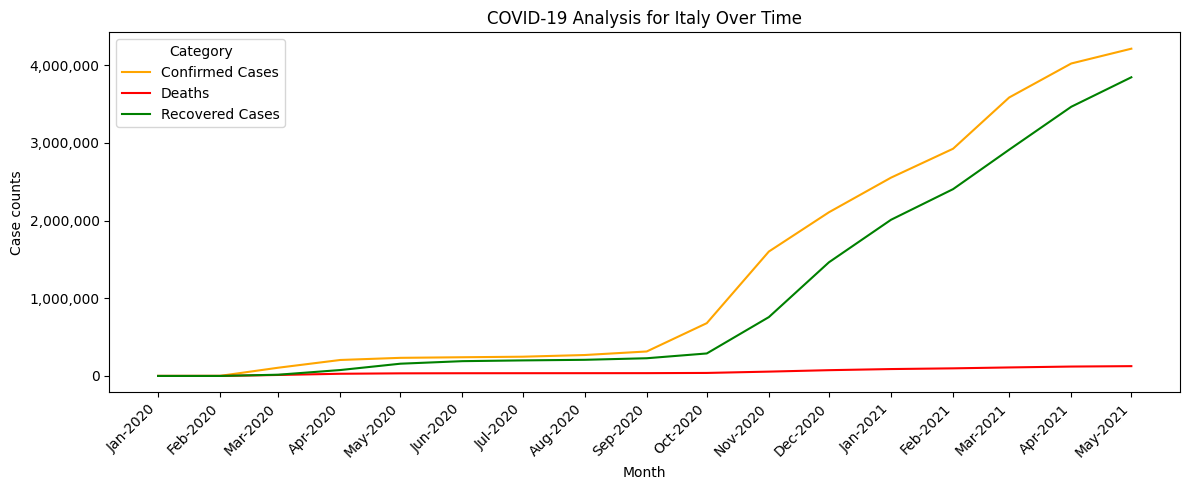

In [85]:
# Filter Italy data and sort by month
Italy_monthly = country_last_day_data[country_last_day_data['Country/Region'] == 'Italy'].drop(columns=['Country/Region', 'Date'])
Italy_monthly = Italy_monthly.sort_values('Month').set_index('Month')
Italy_monthly.index = Italy_monthly.index.to_timestamp()

# Plot the lineplot
fig, ax = plt.subplots(figsize=(12,5))
colors = {"confirmed_cases": "orange", "Deaths": "red", "recovered_cases": "green"}

# Plot each line with specific color and marker
for column in Italy_monthly.columns:
    sns.lineplot(data=Italy_monthly, x=Italy_monthly.index, y=Italy_monthly[column],
                 ax=ax, label=column.replace("_", " ").title(), color=colors[column])

# Format y-axis labels with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set all Month labels explicitly
ax.set_xticks(Italy_monthly.index)  # Use all months as ticks
ax.set_xticklabels(Italy_monthly.index.strftime('%b-%Y'), rotation=45, ha='right')  # Rotate for better readability

plt.xlabel("Month")
plt.ylabel("Case counts")
plt.title("COVID-19 Analysis for Italy Over Time")
plt.legend(title="Category")
plt.grid(False)
plt.tight_layout()
plt.show()
plt.close()

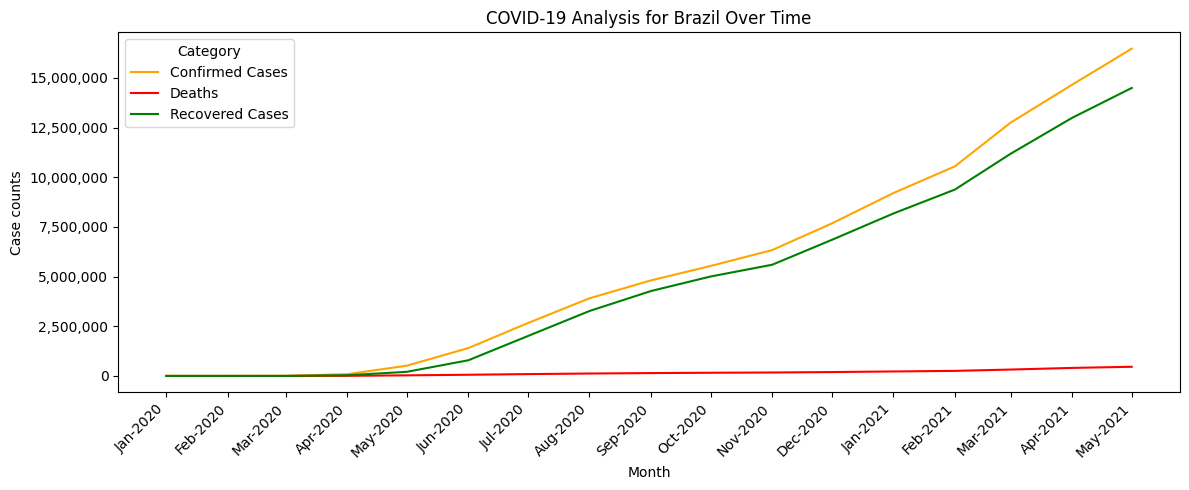

In [86]:
# Filter Brazil data and sort by month
Brazil_monthly = country_last_day_data[country_last_day_data['Country/Region'] == 'Brazil'].drop(columns=['Country/Region', 'Date'])
Brazil_monthly = Brazil_monthly.sort_values('Month').set_index('Month')
Brazil_monthly.index = Brazil_monthly.index.to_timestamp()

# Plot the lineplot
fig, ax = plt.subplots(figsize=(12,5))
colors = {"confirmed_cases": "orange", "Deaths": "red", "recovered_cases": "green"}

# Plot each line with specific color and marker
for column in Brazil_monthly.columns:
    sns.lineplot(data=Brazil_monthly, x=Brazil_monthly.index, y=Brazil_monthly[column],
                 ax=ax, label=column.replace("_", " ").title(), color=colors[column])

# Format y-axis labels with commas
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

# Set all Month labels explicitly
ax.set_xticks(Brazil_monthly.index)  # Use all months as ticks
ax.set_xticklabels(Brazil_monthly.index.strftime('%b-%Y'), rotation=45, ha='right')  # Rotate for better readability

plt.xlabel("Month")
plt.ylabel("Case counts")
plt.title("COVID-19 Analysis for Brazil Over Time")
plt.legend(title="Category")
plt.grid(False)
plt.tight_layout()
plt.show()
plt.close()

We can infer that in Brazil the COVID cases took spike from April month. But for US & Italy it was from march only.

Whereas for India it was from early June.

This shows India had better precautionary process in place than these countries followed by brazil.

*Q8.1: For the combined dataset, identify the three countries with the highest average death rates (deaths/confirmed cases) throughout 2020. What might this indicate about the pandemic's impact in these countries?*

Approach: Extract 2020 data -> Find how many unique dates are there because we have to find average at last -> then do group by countries and sum for last three columns -> then do death/confirmed_cases which should result in a series with death rates column and labels as countries.

In [87]:
print('We have merged dataset named dataset_merged_country_date')
dataset_merged_country_date

We have merged dataset named dataset_merged_country_date


,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,Afghanistan,2020-01-22,0,0,0,2020-01
1,Afghanistan,2020-01-23,0,0,0,2020-01
2,Afghanistan,2020-01-24,0,0,0,2020-01
3,Afghanistan,2020-01-25,0,0,0,2020-01
4,Afghanistan,2020-01-26,0,0,0,2020-01
...,...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,1587,36517,2021-05
95338,Zimbabwe,2021-05-26,38819,1589,36531,2021-05
95339,Zimbabwe,2021-05-27,38854,1592,36541,2021-05
95340,Zimbabwe,2021-05-28,38918,1592,36563,2021-05


In [88]:
#filter 2020 data
merged_dataset_2020 = dataset_merged_country_date[dataset_merged_country_date['Month'].astype(str).str.startswith('2020')]

#count number of dates in 2020. nunique() Counts the number of distinct values in that column
total_dates_2020 = merged_dataset_2020['Date'].nunique()
print(f"Number of days in 2020: {total_dates_2020}")

country_summary_2020 = merged_dataset_2020.groupby('Country/Region')[['confirmed_cases', 'Deaths', 'recovered_cases']].sum()

# getting death rates.
death_rate_2020 = (country_summary_2020['Deaths'] / country_summary_2020['confirmed_cases'])*100
death_rate_2020.name = 'death_rate'

#sort in descending order and get top 3 countries having max death rates.
death_rate_2020_top3 = death_rate_2020.sort_values(ascending=False).head(3)
death_rate_2020_top3

Number of days in 2020: 345


,death_rate
Country/Region,
Yemen,28.496545
MS Zaandam,22.150624
Mexico,10.077496


Yemen has highest death rate (मृत्यु दर) which could be a showcase for its limited healthcare infrastructure.

<ipython-input-89-4200454931>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x = death_rate_2020_top3.index, y = death_rate_2020_top3.values, palette='magma')


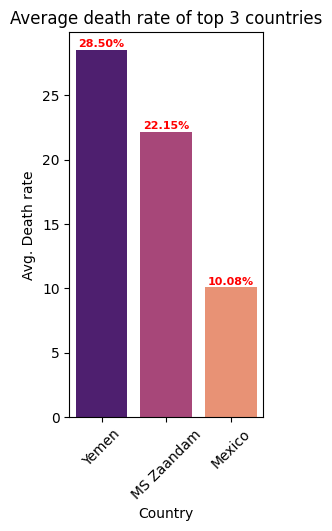

In [89]:
#Comparing discrete categories (like countries)
fig8 = plt.figure(figsize=(2.5,5))
ax = sns.barplot(x = death_rate_2020_top3.index, y = death_rate_2020_top3.values, palette='magma')
# Add y-axis count labels on bars
for i, value in enumerate(death_rate_2020_top3.values):
    ax.text(i, value + (value * 0.005), f"{value:.2f}%", ha='center', va='bottom', fontsize=8, color='red', fontweight='bold') # fontstyle='italic'
plt.xlabel('Country')
plt.ylabel('Avg. Death rate')
plt.title('Average death rate of top 3 countries')
plt.xticks(rotation=45)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
plt.show()
plt.close()

In [90]:
#Just a sample pie chart on how to create and its attributes.
'''fig14 = plt.figure(figsize=(4,4))
death_rate_2020_top3.plot(
    kind='pie',
    autopct='%1.2f%%',    # Show percentage with two decimals
    startangle=90,        # where the first slice of the pie chart begins, measured in degrees counterclockwise from the positive x-axis
    colors=['lightcoral', 'lightskyblue', 'lightgreen'] # Optional: custom colors
)
plt.title('Top 3 Countries by COVID-19 Death Rate (2020)')
plt.ylabel('')  # Hide y-label for aesthetics
plt.tight_layout()
plt.show()
'''

"fig14 = plt.figure(figsize=(4,4))\ndeath_rate_2020_top3.plot(\n    kind='pie',\n    autopct='%1.2f%%',    # Show percentage with two decimals\n    startangle=90,        # where the first slice of the pie chart begins, measured in degrees counterclockwise from the positive x-axis\n    colors=['lightcoral', 'lightskyblue', 'lightgreen'] # Optional: custom colors\n)\nplt.title('Top 3 Countries by COVID-19 Death Rate (2020)')\nplt.ylabel('')  # Hide y-label for aesthetics\nplt.tight_layout()\nplt.show()\n"

Q8.2: Using the merged dataset, compare the total number of recoveries to the total number of deaths in South Africa. What can this tell us about the outcomes of COVID-19 cases in the country?

Ans: It is asking total number of recoveries and deaths, which will be present in last day entry as it is cumulative data. Approach: extract Africa data from date wise merged data -> extract last date -> sum

In [91]:
print('We have merged dataset named dataset_merged_country_date')
dataset_merged_country_date

We have merged dataset named dataset_merged_country_date


,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,Afghanistan,2020-01-22,0,0,0,2020-01
1,Afghanistan,2020-01-23,0,0,0,2020-01
2,Afghanistan,2020-01-24,0,0,0,2020-01
3,Afghanistan,2020-01-25,0,0,0,2020-01
4,Afghanistan,2020-01-26,0,0,0,2020-01
...,...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,1587,36517,2021-05
95338,Zimbabwe,2021-05-26,38819,1589,36531,2021-05
95339,Zimbabwe,2021-05-27,38854,1592,36541,2021-05
95340,Zimbabwe,2021-05-28,38918,1592,36563,2021-05


In [92]:
africa_data = dataset_merged_country_date[dataset_merged_country_date['Country/Region'].str.contains('South Africa', case=False)]
africa_data_sorted = africa_data.sort_values('Date')
last_date = africa_data_sorted['Date'].max()
print(f'last date is {last_date}')

# Filter rows for last date as that will only be final value for differnt province.
africa_last_day_data = africa_data_sorted[africa_data_sorted['Date'] == last_date]
africa_last_day_data

last date is 2021-05-29 00:00:00


,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
80027,South Africa,2021-05-29,1659070,56363,1554184,2021-05


<ipython-input-93-2806999550>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total', data=df, palette='magma')


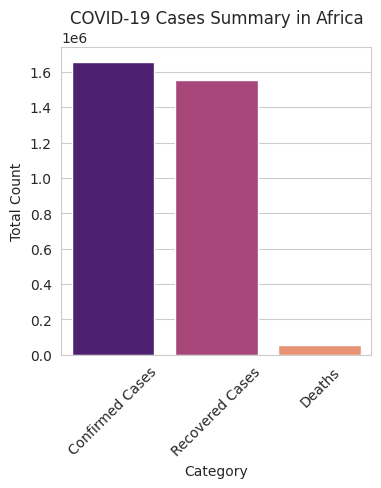

In [93]:
africa_totals = {
    'Confirmed Cases': 1659070,
    'Recovered Cases': 1554184,
    'Deaths': 56363
}
# Convert dictionary to a DataFrame
df = pd.DataFrame(list(africa_totals.items()), columns=['Category', 'Total'])

sns.set_style("whitegrid")
fig15 = plt.figure(figsize=(4, 4))
sns.barplot(x='Category', y='Total', data=df, palette='magma')
plt.xlabel("Category")
plt.ylabel("Total Count")
plt.title("COVID-19 Cases Summary in Africa")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.show()

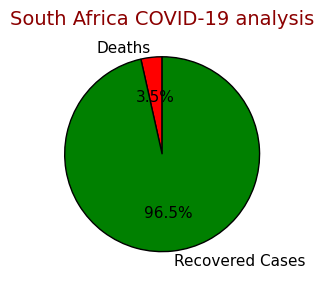

In [94]:
# Data
confirmed_cases = 1659070
deaths = 56363
recovered_cases = 1554184

# Calculate percentages: taken confirmed cases as 100% and calculating deaths and recovered on confirmed cases as base.
death_percentage = (deaths / confirmed_cases) * 100
recovered_percentage = (recovered_cases / confirmed_cases) * 100

# Labels and values for the pie chart
labels = ['Deaths', 'Recovered Cases']
sizes = [death_percentage, recovered_percentage]
colors = ['red', 'green']

# Plot the pie chart
fig, ax = plt.subplots(figsize=(3,3))
ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90,
       wedgeprops={'edgecolor': 'black'},
       textprops={'fontsize': 12, 'color': 'black'})  # Change percentage color

# Change label text color
for text in ax.texts:
    text.set_color('black')  # Labels will appear in purple
    text.set_fontsize(11)

# Title
plt.title("South Africa COVID-19 analysis", color="darkred", fontsize=14)
plt.ylabel('')  # Hide y-label for aesthetics
plt.tight_layout()
plt.show()

Q8.3: Analyze the ratio of recoveries to confirmed cases for the United States monthly from March 2020 to May 2021. Which month experienced the highest recovery ratio, and what could be the potential reasons?

Ans: Approach: extract the data for US only of months from March 2020 and May2021 -> get last dated row of each month ->

In [95]:
print('We have merged dataset named dataset_merged_country_date')
dataset_merged_country_date

We have merged dataset named dataset_merged_country_date


,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,Afghanistan,2020-01-22,0,0,0,2020-01
1,Afghanistan,2020-01-23,0,0,0,2020-01
2,Afghanistan,2020-01-24,0,0,0,2020-01
3,Afghanistan,2020-01-25,0,0,0,2020-01
4,Afghanistan,2020-01-26,0,0,0,2020-01
...,...,...,...,...,...,...
95337,Zimbabwe,2021-05-25,38706,1587,36517,2021-05
95338,Zimbabwe,2021-05-26,38819,1589,36531,2021-05
95339,Zimbabwe,2021-05-27,38854,1592,36541,2021-05
95340,Zimbabwe,2021-05-28,38918,1592,36563,2021-05


In [96]:
dataset_merged_country_date['Date'] = pd.to_datetime(dataset_merged_country_date['Date'])

#filtering for US data for given months.
us_data = dataset_merged_country_date[
    (dataset_merged_country_date['Country/Region'] == 'US') &
    (dataset_merged_country_date['Date'] >= '2020-03-01') &
    (dataset_merged_country_date['Date'] <= '2021-05-31')
]

# Select only rows where the date is the last day of the month
us_month_last_date = us_data.loc[us_data.groupby([us_data['Date'].dt.year, us_data['Date'].dt.month])['Date'].idxmax()]
# or could have used us_month_last = us_data.loc[us_data.groupby('YearMonth')['Date'].idxmax()]

us_month_last_date.reset_index(drop=True, inplace=True)
us_month_last_date

,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,US,2020-03-31,192301,5370,7024,2020-03
1,US,2020-04-30,1081020,66235,153947,2020-04
2,US,2020-05-31,1798718,107840,444758,2020-05
3,US,2020-06-30,2642174,127607,720631,2020-06
4,US,2020-07-31,4567420,154157,1438160,2020-07
5,US,2020-08-31,6026895,183818,2184825,2020-08
6,US,2020-09-30,7235428,207217,2840688,2020-09
7,US,2020-10-31,9165619,231749,3612478,2020-10
8,US,2020-11-30,13670332,271020,5146319,2020-11
9,US,2020-12-31,20099363,352163,0,2020-12


Recovered cases cannot be 0 for last few months when people have already recovered in previous months. SO, lets impute that value using interpolate() method. So convert 0 to NaN first then interpolate.

But since the nan is at end of our dataset, interpolation will not work. We need to use ffill or extrapolate.

In [97]:
# # Step 1: Replace 0 values with NaN (to allow interpolation)
us_month_last_date['recovered_cases'] = us_month_last_date['recovered_cases'].replace(0, np.nan)
# us_month_last_date['recovered_cases'] = us_month_last_date['recovered_cases'].ffill()  # Either use ffill or extrapolate as below.

from scipy.interpolate import interp1d

# ensure index is in numeric. Drop missing values before extrapolation to ensure valid points are used for fitting.
# Step 2: Drop missing values to create a subset for interpolation
data_for_interpolation = us_month_last_date.dropna(subset=['recovered_cases']).copy() # .copy() avoids modifying the original dataframe accidentally.

# Step 3: Use the existing numeric index (since it's already from 0 to 14)
x_valid = data_for_interpolation.index  # x_valid contains the existing index values where data exists.
y_valid = data_for_interpolation['recovered_cases']  # y_valid stores the Corresponding recovered cases

'''
# Step 4: Create linear interpolation function using valid data points
f = interp1d(x_valid, y_valid, fill_value='extrapolate') # fill_value='extrapolate' ensures interpolation continues beyond the last known value.

# Step 5: Apply interpolation to the full dataset. Uses the interpolation function to estimate missing values based on trends.
us_month_last_date['recovered_cases'] = f(us_month_last_date.index)
'''
# Step 4: Create polynomial interpolation function (order=3 for cubic fit)
poly_fit = np.polyfit(x_valid, y_valid, deg=2)  # Fit polynomial of degree 3
poly_func = np.poly1d(poly_fit)  # Generate polynomial function

# Step 5: Apply interpolation **ONLY to missing values**
missing_mask = us_month_last_date['recovered_cases'].isna()  # Identify NaN positions
us_month_last_date.loc[missing_mask, 'recovered_cases'] = poly_func(us_month_last_date.index[missing_mask])

us_month_last_date['recovered_cases'] = us_month_last_date['recovered_cases'].round().astype('Int64')

# Display the updated DataFrame
us_month_last_date

,Country/Region,Date,confirmed_cases,Deaths,recovered_cases,Month
0,US,2020-03-31,192301,5370,7024,2020-03
1,US,2020-04-30,1081020,66235,153947,2020-04
2,US,2020-05-31,1798718,107840,444758,2020-05
3,US,2020-06-30,2642174,127607,720631,2020-06
4,US,2020-07-31,4567420,154157,1438160,2020-07
5,US,2020-08-31,6026895,183818,2184825,2020-08
6,US,2020-09-30,7235428,207217,2840688,2020-09
7,US,2020-10-31,9165619,231749,3612478,2020-10
8,US,2020-11-30,13670332,271020,5146319,2020-11
9,US,2020-12-31,20099363,352163,6251698,2020-12


In [98]:
recovery_ratio = (us_month_last_date['recovered_cases'] / us_month_last_date['confirmed_cases'])*100
recovery_ratio.index = us_month_last_date['Date']
recovery_ratio.name = 'recovery_ratio'
recovery_ratio
# us_month_last_date - recover_data - see above. so 0/any is 0 so recovery ratio 0.

,recovery_ratio
Date,
2020-03-31,3.652607
2020-04-30,14.240902
2020-05-31,24.726388
2020-06-30,27.274169
2020-07-31,31.48736
2020-08-31,36.251254
2020-09-30,39.260815
2020-10-31,39.413355
2020-11-30,37.645896


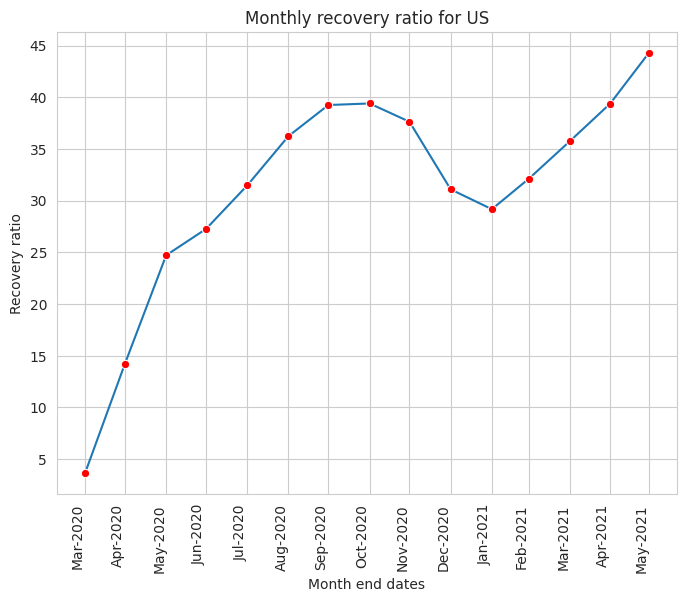

In [99]:
fig16 = plt.figure(figsize=(8, 6))
ax1 = sns.lineplot(data = recovery_ratio, marker='o', markerfacecolor='red', markersize=6) # Refers to the axes object of your plot, which contains the x and y axes.
plt.xlabel('Month end dates')
plt.ylabel('Recovery ratio')
plt.title('Monthly recovery ratio for US')
plt.xticks(rotation=90)
   # To avoid exponential notation on y-axis
ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x)))) # x: The value of the tick.
   #"{:,}".format(int(x)): Formats the tick value as an integer with commas as thousand separators (e.g., 10000 becomes "10,000")
# Set all Month labels explicitly
ax1.set_xticks(recovery_ratio.index)  # Use all months as ticks
ax1.set_xticklabels(recovery_ratio.index.strftime('%b-%Y'), rotation=90, ha='right')  # Rotate for better readability
plt.show()

The COVID-19 recovery ratio (recovered cases ÷ confirmed cases) in the U.S. can be seen relatively high during mid to late 2021. Key Reasons for High Recovery Ratio could be Rapid vaccine rollout.

`***THANK-YOU!***`

*`Regards`*

*`Pratik.`*